<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 8 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Produisez une étude de marché avec R ou Python
</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
#Importation des packages nécessaires 
import pandas as pd 
import numpy as np 
#Les packages de visualization
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
#Importer les packages de préparation de données 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
#Importer les packages de clustering 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#importer les packages de CAH "La classification ascendante hiérarchique"
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy import stats
import plotly.graph_objects as go

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement du Data frame </h3>
</div>

In [2]:
# Importation des fichier

df_methode = pd.read_pickle('D:\\CODE\\Projet Openclassrooms\\Projet n_8\\partage.pkl')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse des données </h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Méthode du coude </h3>
</div>

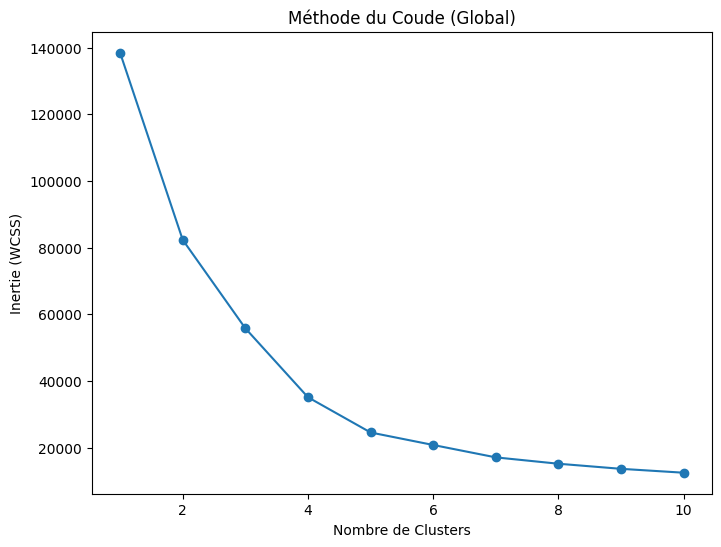

In [3]:
import warnings
warnings.filterwarnings('ignore')
# Normalisation des données globales
colonnes_numeriques = ['Production/T', 'Importations - Quantité/T', 'Disponibilité intérieure/T', 'Nourriture/T', 'Kg/personne/an', 'Kcal/personne/jour', 'Population', 'Croissance annuelle US$ par habitant %', 'US $ par habitant', 'Total_T_personne_an', 'Total_USD']
scaler_global = RobustScaler()
df_scaled_global = scaler_global.fit_transform(df_methode[colonnes_numeriques])

# Méthode du coude pour l'ensemble des données
max_clusters = 10
inertias = []

for i in range(1, max_clusters + 1):
    kmeans_global = KMeans(n_clusters=i, init='k-means++')
    kmeans_global.fit(df_scaled_global)
    inertias.append(kmeans_global.inertia_)

# Tracer la courbe de la méthode du coude pour l'ensemble des données
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inertias, marker='o')
plt.title('Méthode du Coude (Global)')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie (WCSS)')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Réalisation du scaler et du log  </h3>
</div>

In [4]:
colonnes_numeriques = ['Production/T', 'Importations - Quantité/T', 'Disponibilité intérieure/T', 'Nourriture/T', 'Kg/personne/an', 'Kcal/personne/jour', 'Population', 'Croissance annuelle US$ par habitant %', 'US $ par habitant', 'Total_T_personne_an', 'Total_USD']
df_numerique = df_methode[colonnes_numeriques]
# Utilisez np.log1p pour éviter les erreurs avec les valeurs zéro
df_log = df_numerique.applymap(lambda x: 0 if x == 0 else np.log(x))
df_log = df_log.fillna(0)
# Appliquer le RobustScaler pour réduire l'impact des outliers
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_log)


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Méthode K-means  </h3>
</div>


Analyse pour l'année 2010
Année 2010 - Cluster 0 - Centroïde: [0.13638039 0.28173491 0.22034728 0.20353123 1.16353001 1.18185609
 0.18589761 0.38413774 0.78089711 0.76298077 0.28418344]
Année 2010 - Cluster 1 - Centroïde: [0.58250559 0.43841251 0.63991206 0.6349633  0.88178141 0.89497784
 0.64408109 1.07925523 0.68088577 1.08603038 0.7021588 ]
Année 2010 - Cluster 2 - Centroïde: [0.65292769 0.78457435 0.72252245 0.70906331 0.97442847 0.99238062
 0.66417408 0.09921253 0.96260381 1.134559   0.88705791]
Année 2010 - Cluster 3 - Centroïde: [0.33590697 0.1709467  0.35153391 0.35083667 0.31838896 0.2860817
 0.6895297  0.73855094 0.24639029 0.85955469 0.46494282]
Année 2010 - Cluster 4 - Centroïde: [1.14956157 0.70063523 1.21332132 1.20704182 1.04391726 1.06251994
 1.01761258 1.27274389 0.79839709 1.43867616 1.15911619]

Année 2010 - Cluster 0
['Antigua-et-Barbuda', 'Bahamas', 'Barbade', 'Belize', 'Cabo Verde', 'Comores', 'Dominique', 'Fidji', 'Grenade', 'Guyana', 'Islande', 'Kiribati', 'Lux

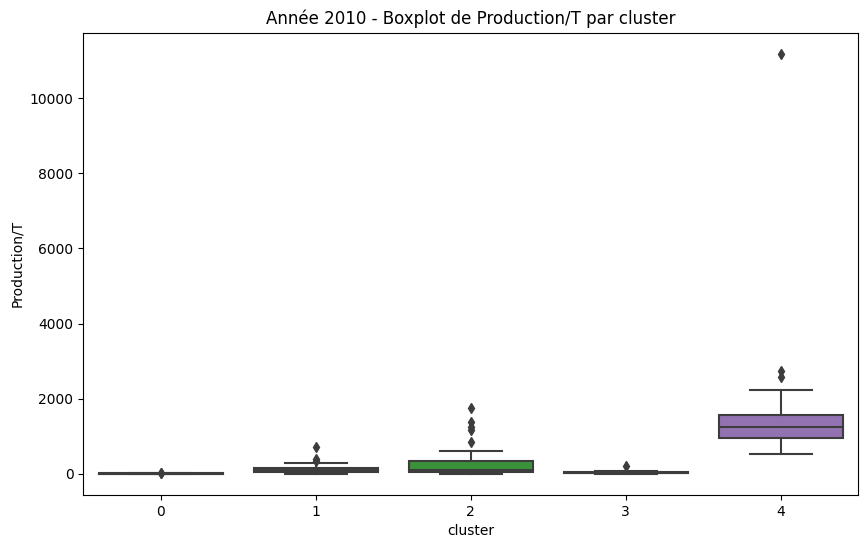

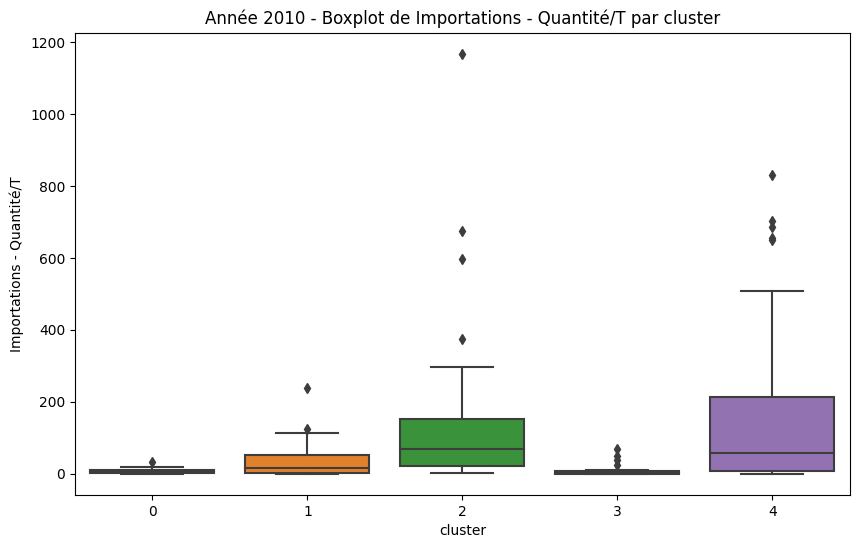

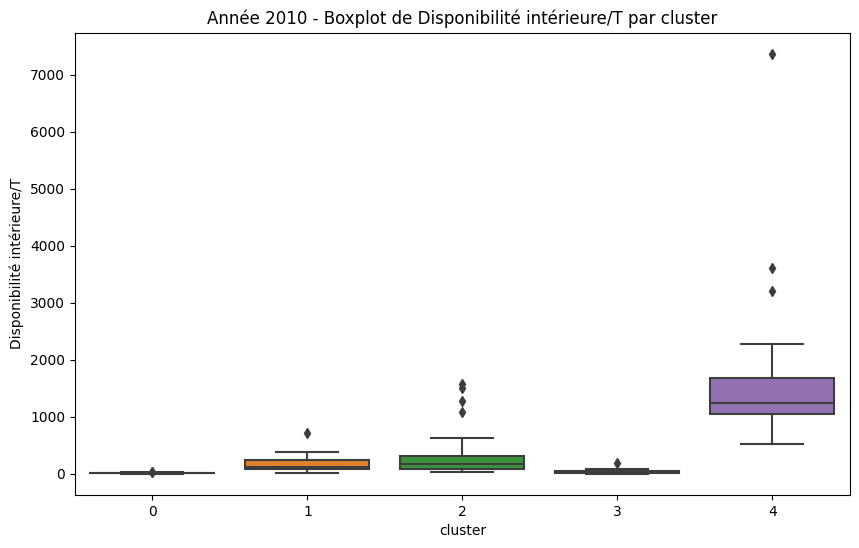

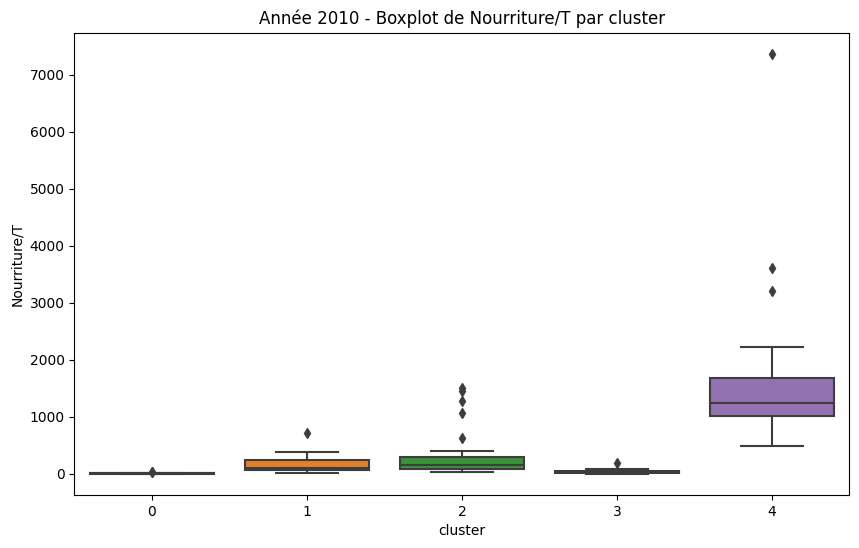

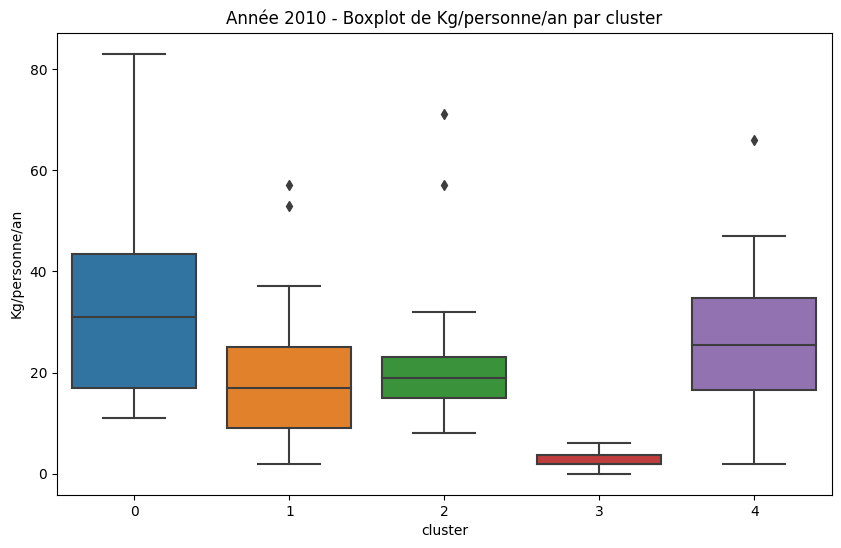

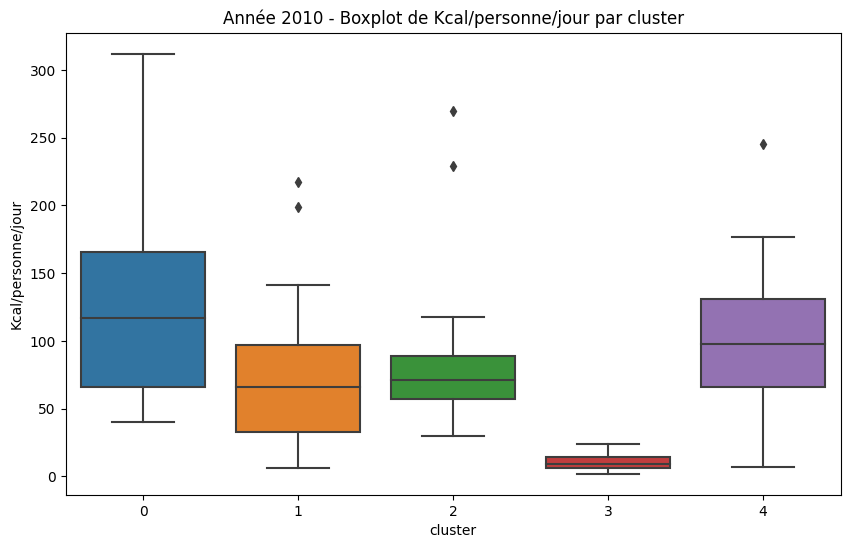

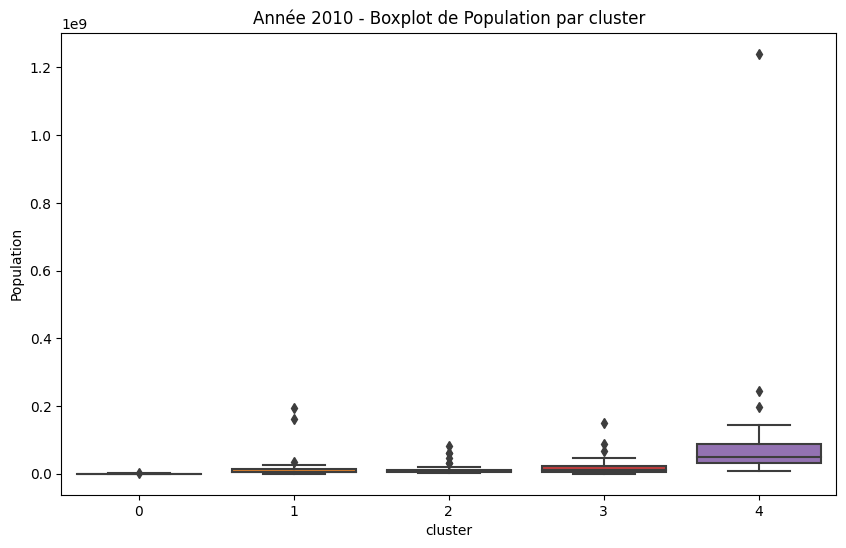

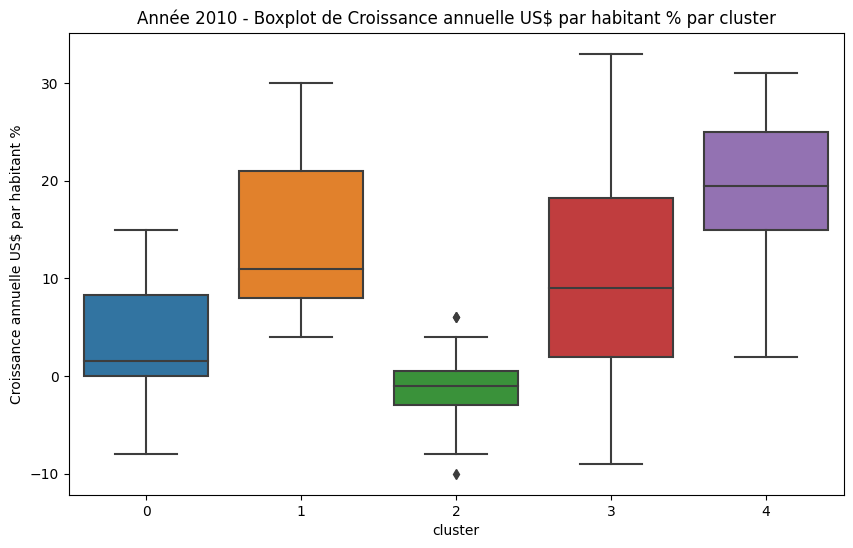

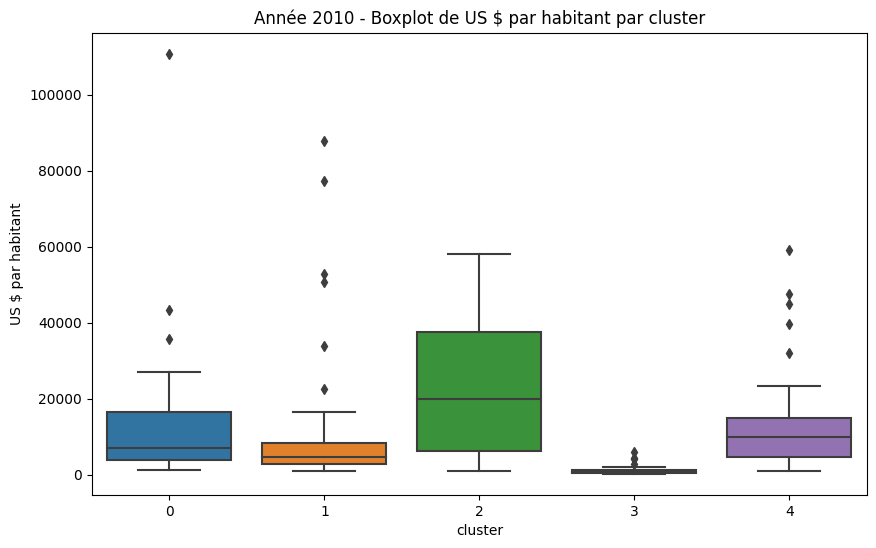

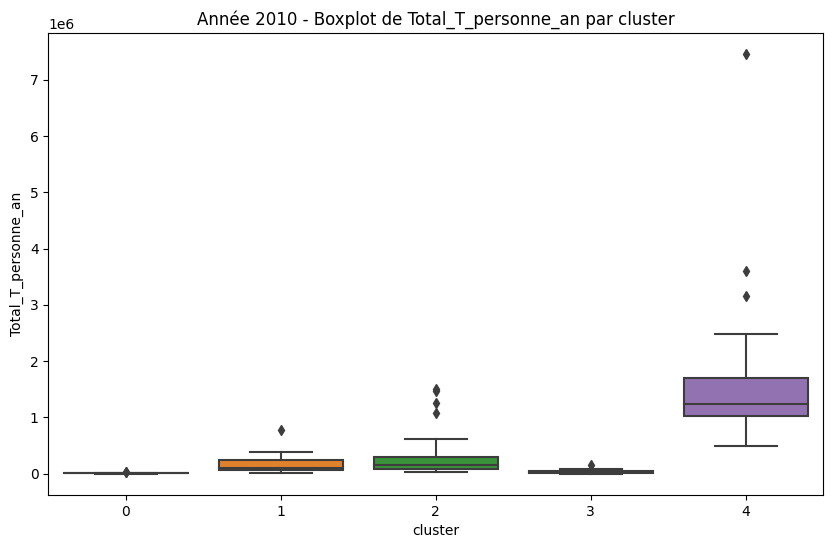

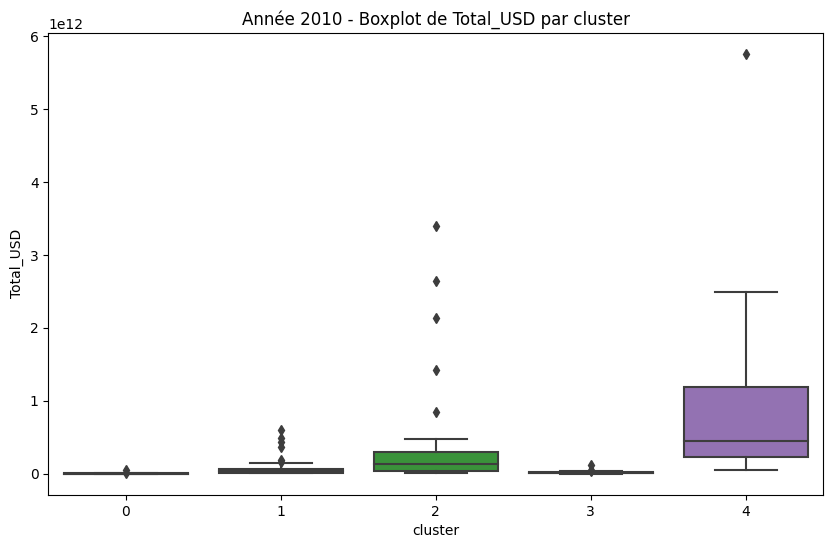


Analyse pour l'année 2011
Année 2011 - Cluster 0 - Centroïde: [1.10809012 0.3318163  1.09917017 1.09235478 1.01042115 1.02786522
 0.99850896 1.05168658 0.66851468 1.38871644 1.04193331]
Année 2011 - Cluster 1 - Centroïde: [0.52945872 0.57998344 0.56033012 0.55300027 0.99311572 1.01324602
 0.58778823 0.90237761 0.78700776 1.05853466 0.69985436]
Année 2011 - Cluster 2 - Centroïde: [0.3622776  0.17283595 0.32507279 0.32470899 0.34215061 0.3191625
 0.70345759 0.92375929 0.27461402 0.84642584 0.4886823 ]
Année 2011 - Cluster 3 - Centroïde: [0.13187407 0.26910554 0.16829929 0.14960331 1.2364021  1.25335735
 0.17690811 0.54994796 0.78657786 0.75507574 0.26946083]
Année 2011 - Cluster 4 - Centroïde: [0.98193246 1.19402936 1.05747269 1.03854996 1.12618668 1.14590301
 0.90747544 0.84254849 1.0662104  1.35858258 1.2159977 ]

Année 2011 - Cluster 0
['Algérie', 'Argentine', 'Australie', 'Bolivie (État plurinational de)', 'Brésil', 'Colombie', 'Égypte', 'Équateur', 'Inde', 'Indonésie', "Iran (Répub

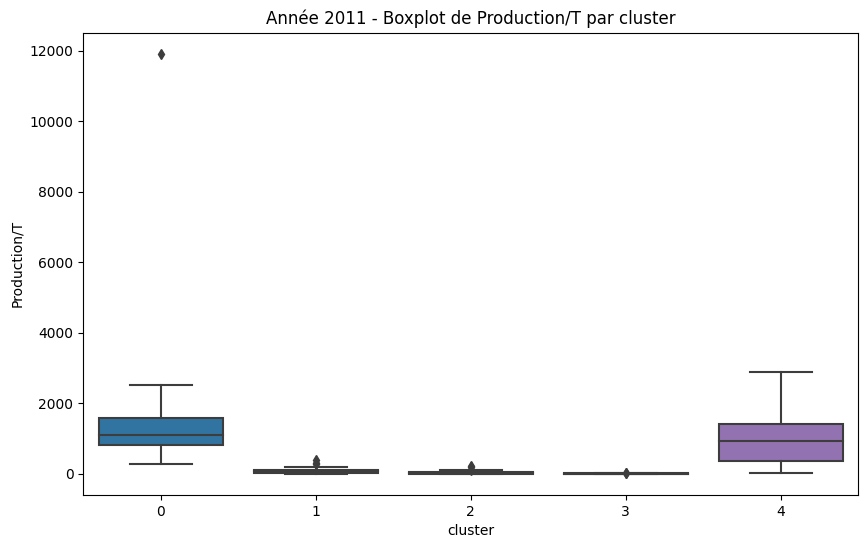

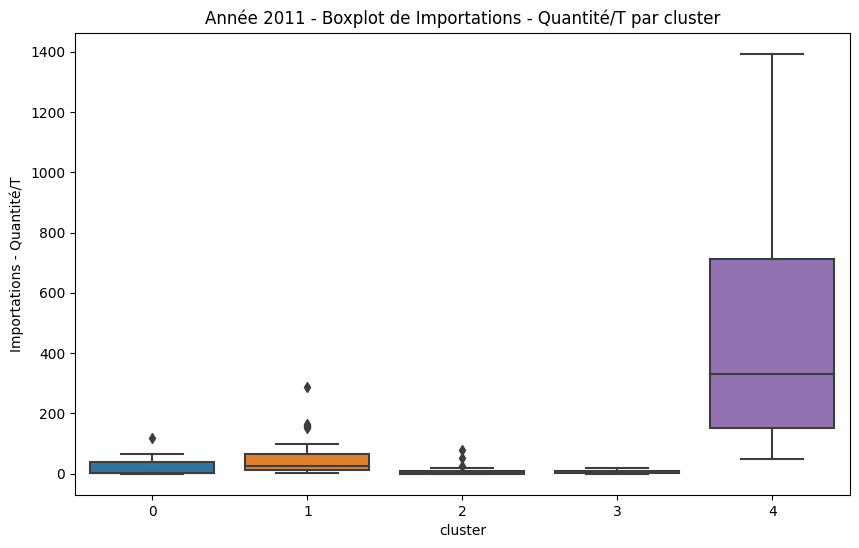

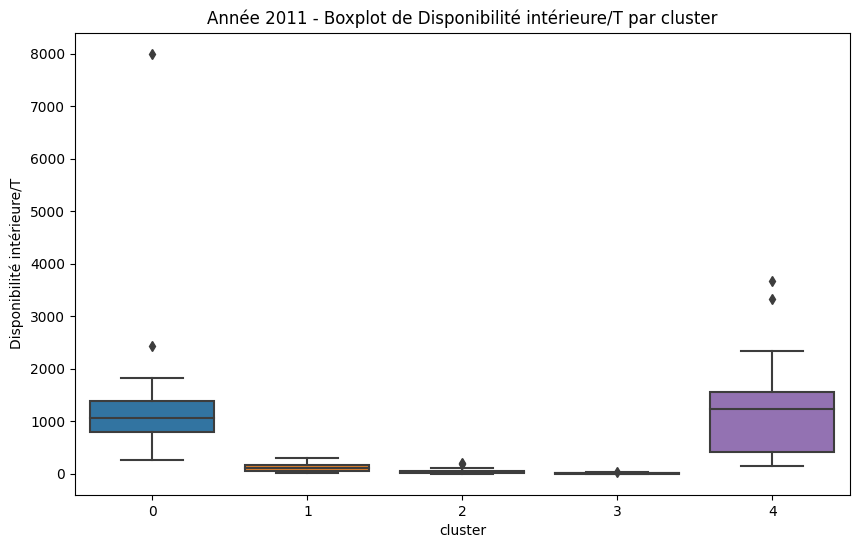

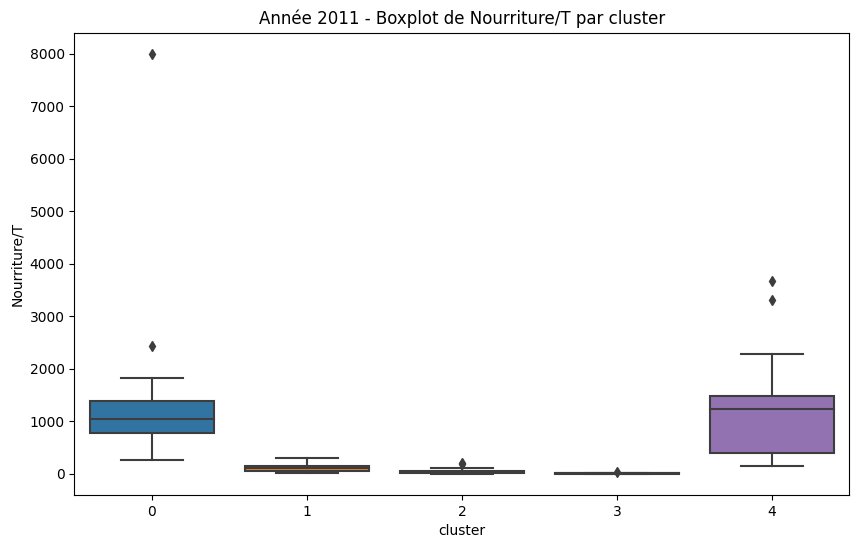

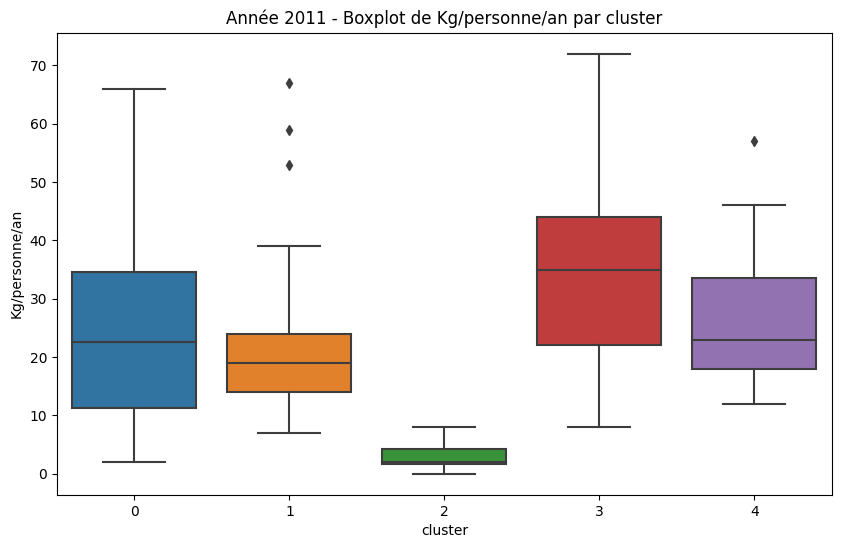

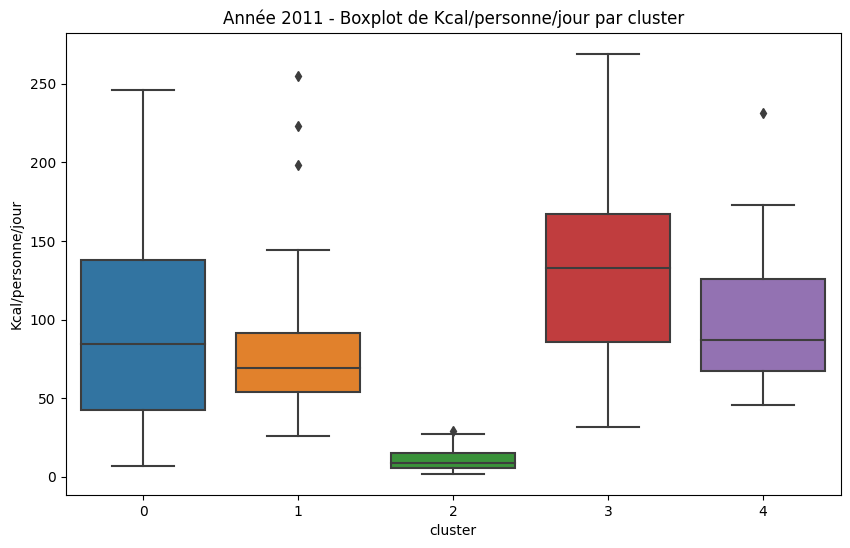

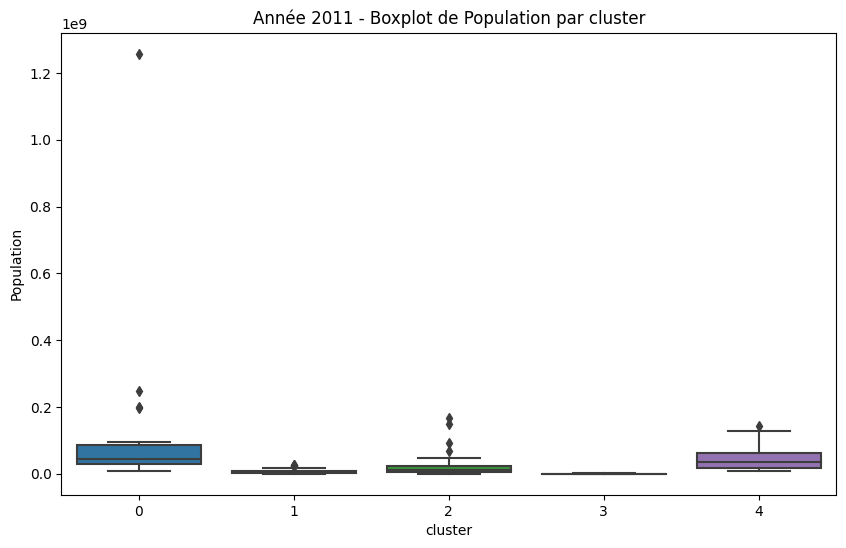

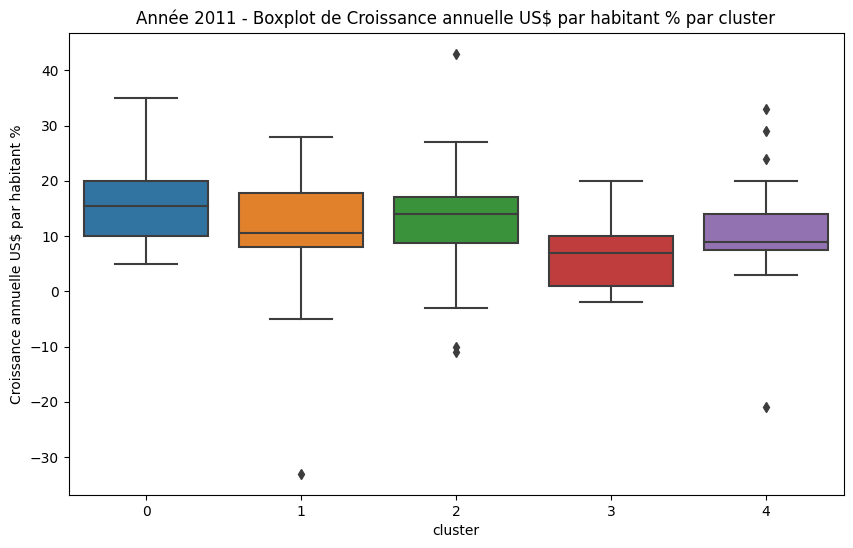

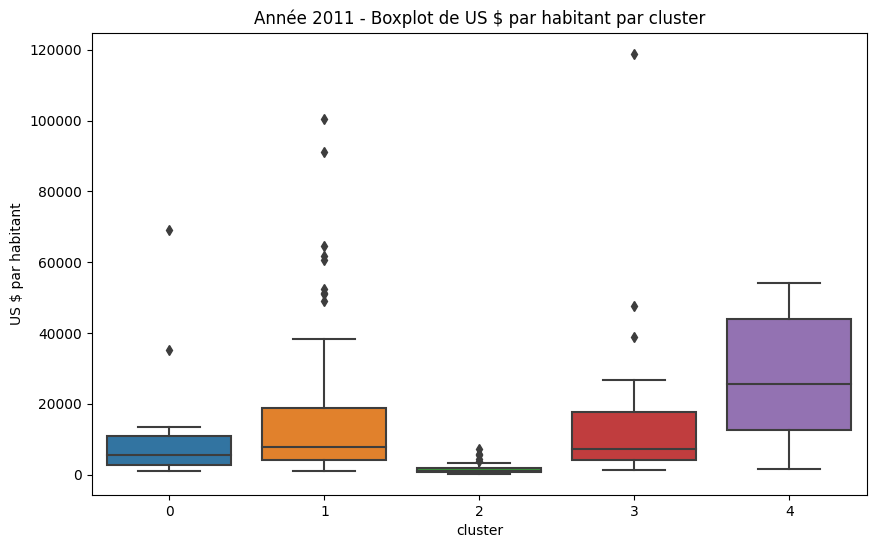

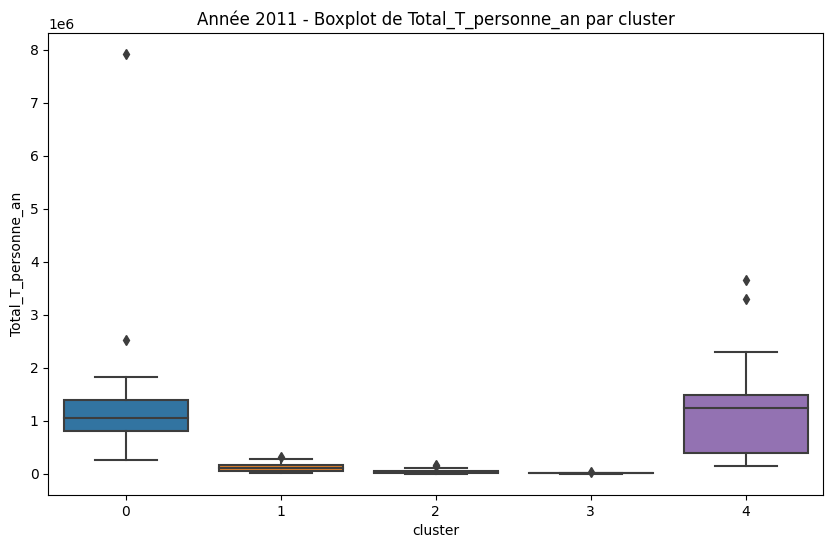

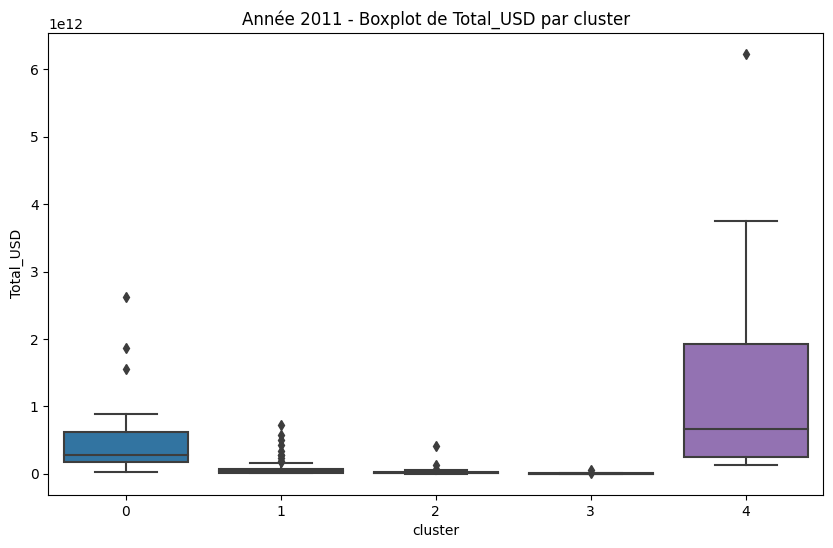


Analyse pour l'année 2012
Année 2012 - Cluster 0 - Centroïde: [0.95890595 0.07246269 0.95319923 0.94971012 0.68942885 0.77039888
 1.01882651 0.44034847 0.53149844 1.27688617 0.95435019]
Année 2012 - Cluster 1 - Centroïde: [0.16025344 0.31731326 0.24153481 0.22679191 1.19780441 1.25672371
 0.20784071 0.17623975 0.82472815 0.77798029 0.3107345 ]
Année 2012 - Cluster 2 - Centroïde: [1.10236033 1.06493852 1.18478981 1.17873417 1.15174101 1.21411517
 0.97404701 0.30520146 0.96041363 1.42094828 1.2126046 ]
Année 2012 - Cluster 3 - Centroïde: [0.58409064 0.67759331 0.65656808 0.64614576 1.00915753 1.07508493
 0.61802637 0.21452743 0.83326799 1.09013206 0.75016416]
Année 2012 - Cluster 4 - Centroïde: [0.34926883 0.22280814 0.36302981 0.36031769 0.3584486  0.41220441
 0.68096596 0.37834954 0.277267   0.84299711 0.46700765]

Année 2012 - Cluster 0
['Algérie', 'Bangladesh', 'Bolivie (État plurinational de)', 'Équateur', 'Inde', 'Indonésie', 'Libye', 'Maroc', 'Myanmar', 'Nigéria', 'Pakistan', 'Sr

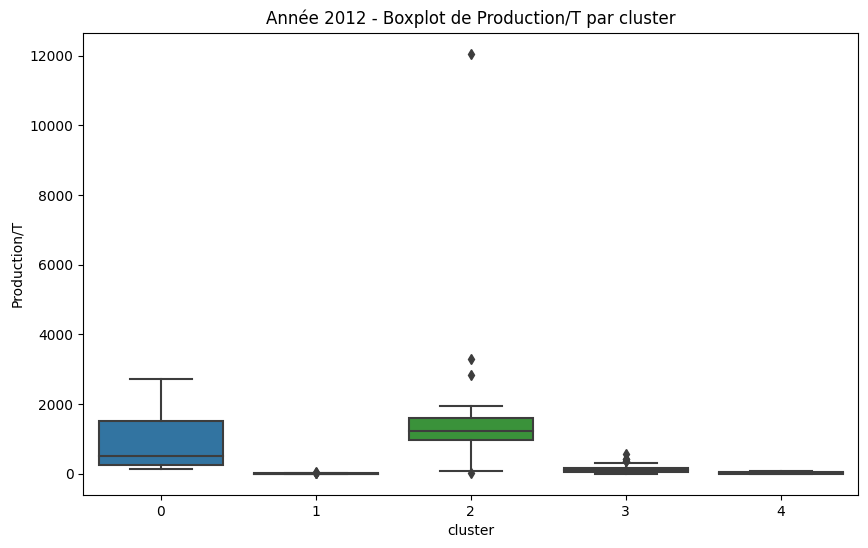

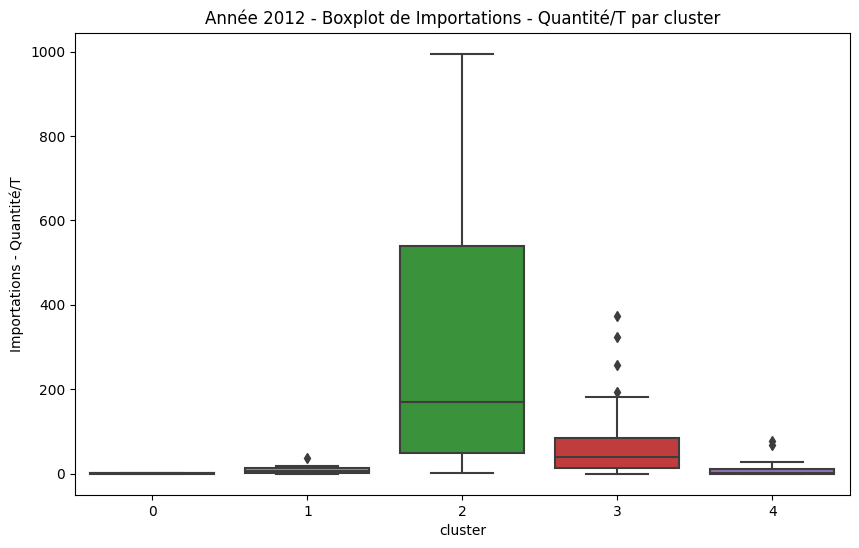

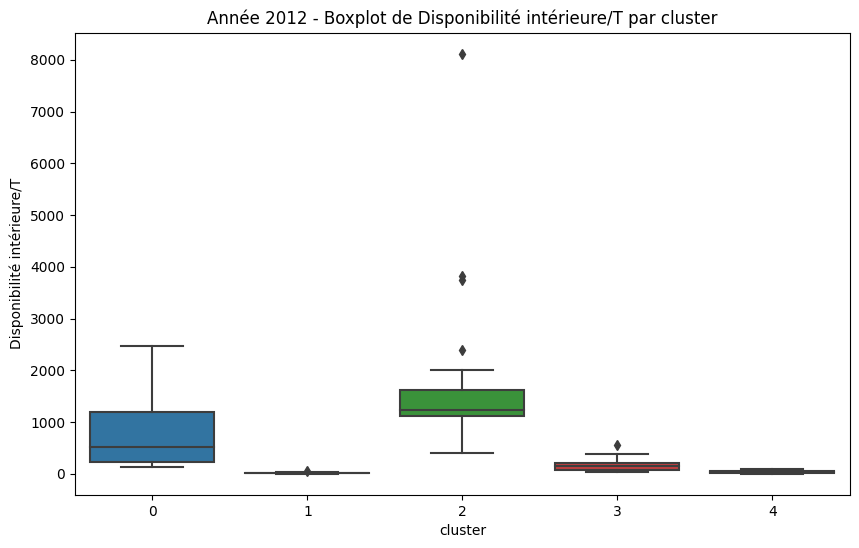

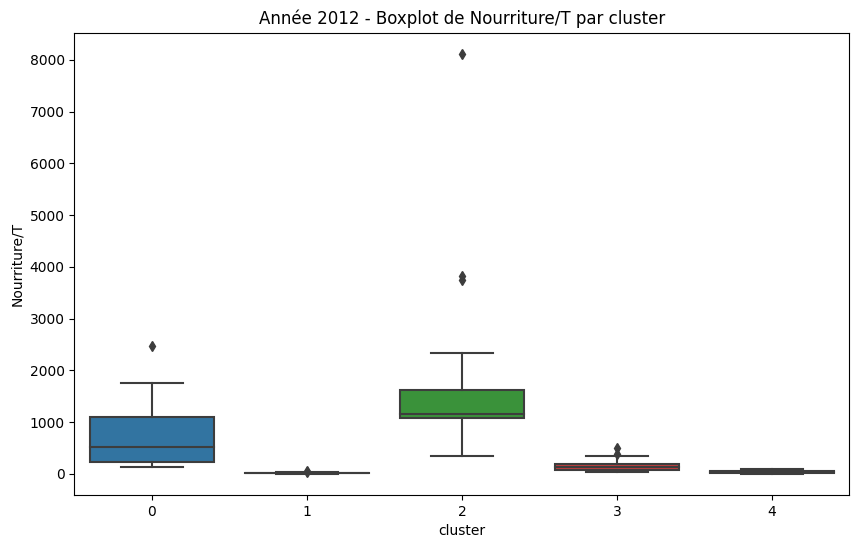

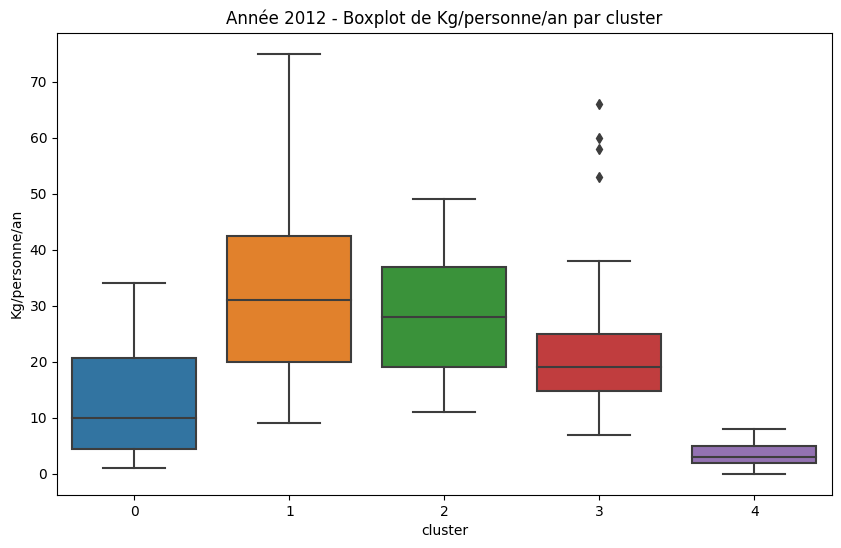

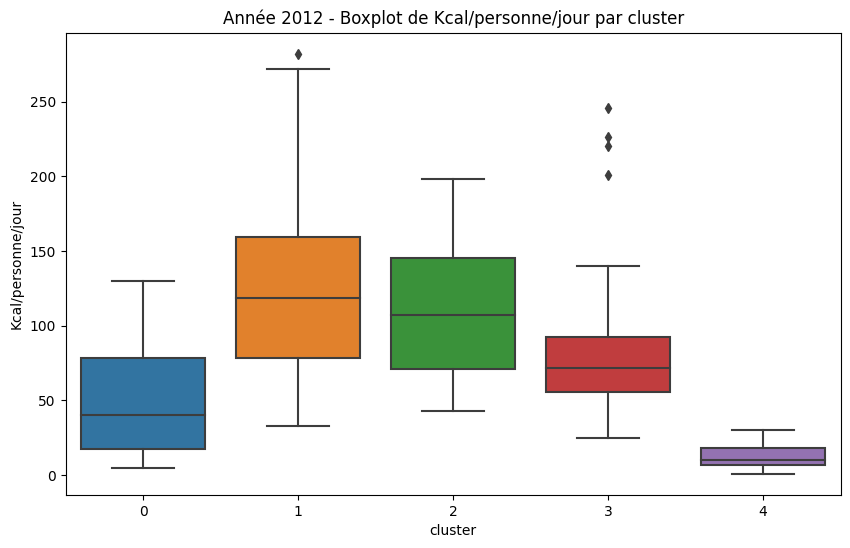

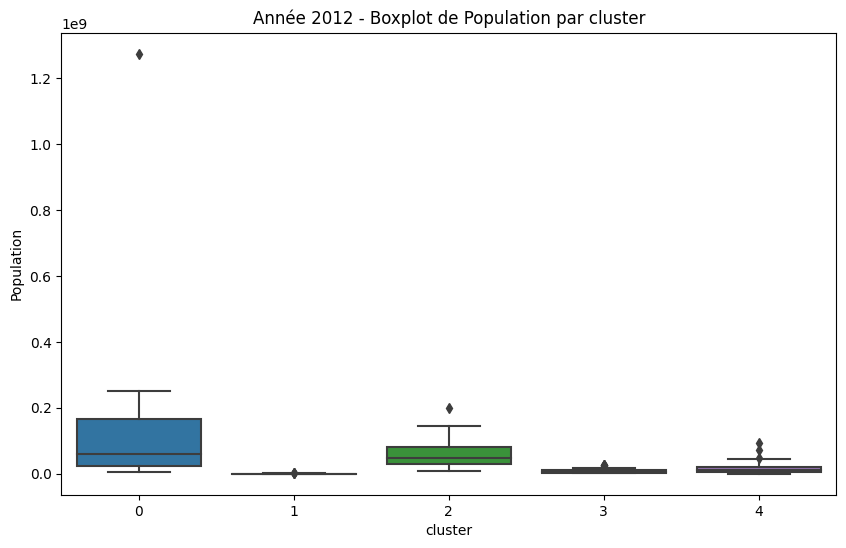

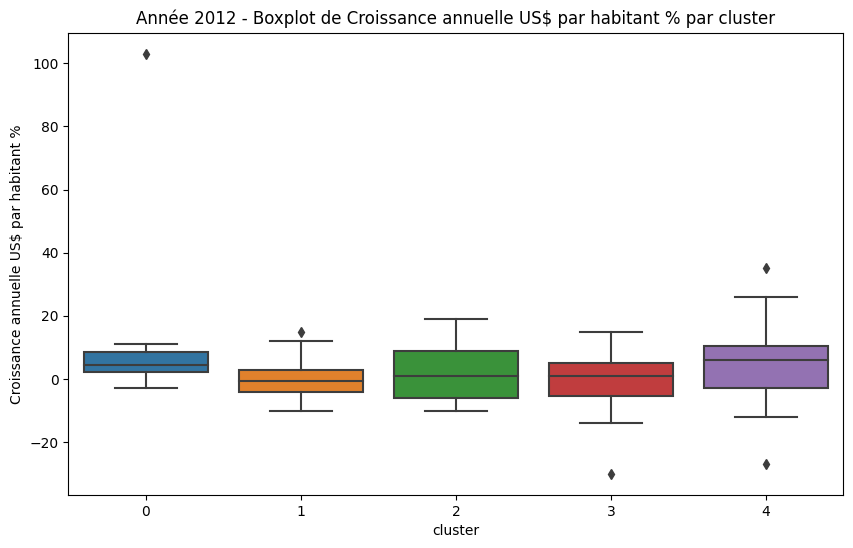

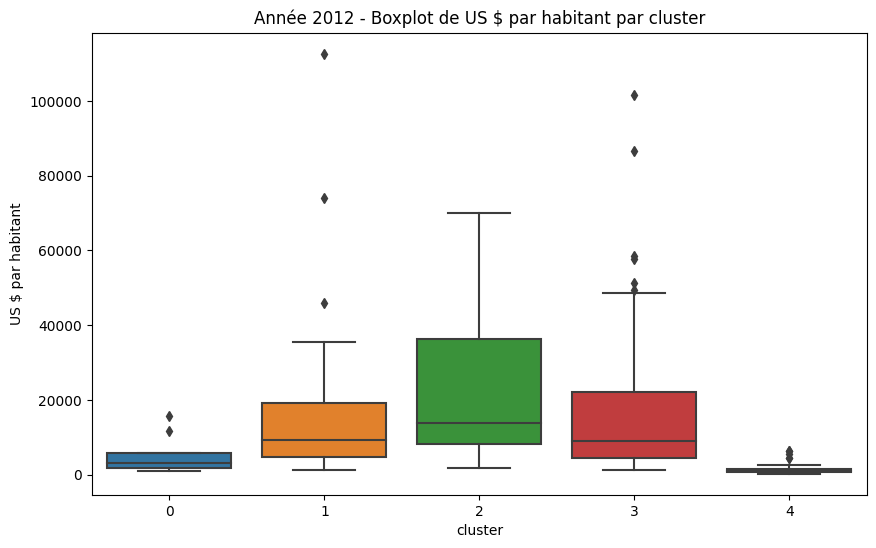

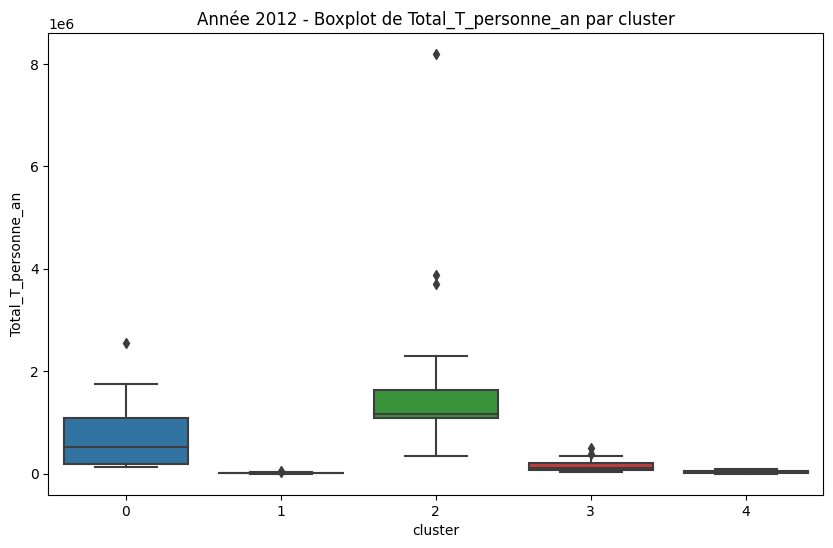

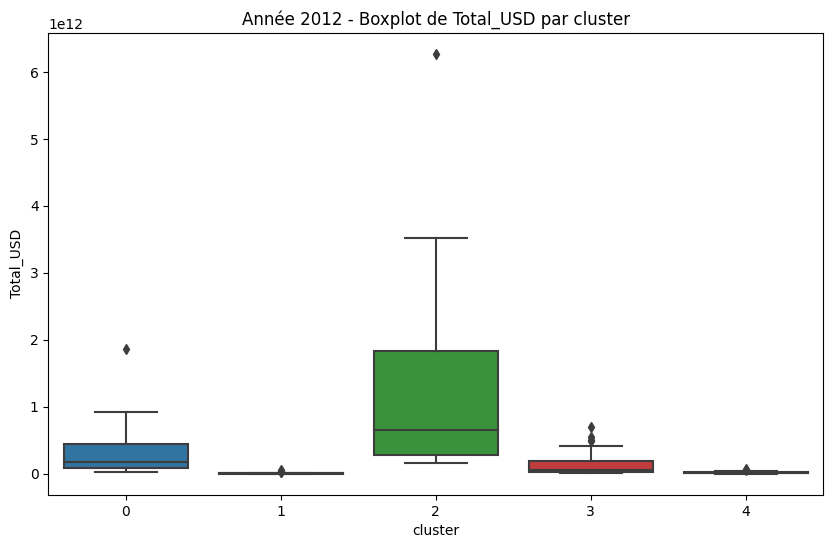


Analyse pour l'année 2013
Année 2013 - Cluster 0 - Centroïde: [0.23142485 0.19394562 0.19583136 0.19583136 0.38582556 0.44509132
 0.53094739 0.08526602 0.303      0.68834422 0.369154  ]
Année 2013 - Cluster 1 - Centroïde: [1.14832607 0.81508669 1.1717169  1.16534264 1.07179171 1.13970323
 1.02639555 0.38133203 0.85050053 1.42602977 1.23841419]
Année 2013 - Cluster 2 - Centroïde: [0.43442088 0.24388236 0.42030636 0.4165412  0.38871223 0.44725372
 0.7675359  0.93576367 0.29898065 0.96107409 0.57685065]
Année 2013 - Cluster 3 - Centroïde: [0.15220477 0.31950079 0.20388377 0.18917766 1.25003493 1.30761214
 0.20874214 0.70330871 0.85247637 0.78614552 0.33902789]
Année 2013 - Cluster 4 - Centroïde: [0.60364153 0.61987695 0.62730813 0.61801233 1.02091343 1.09203814
 0.62843155 0.56456757 0.83564887 1.09630459 0.79173358]

Année 2013 - Cluster 0
['Afghanistan', 'Botswana', 'Burundi', 'Eswatini', 'Gambie', 'Guinée-Bissau', 'Îles Salomon', 'Kiribati', 'Lesotho', 'Malawi', 'Mongolie', 'Namibie',

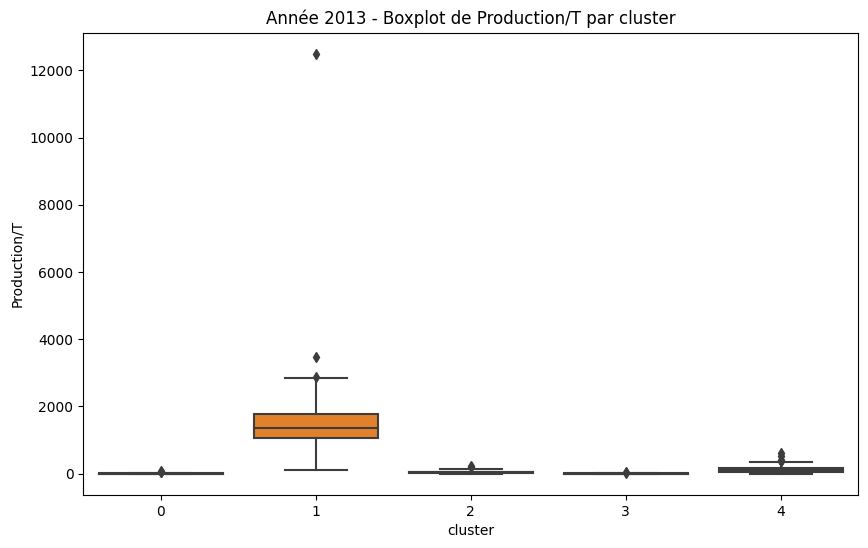

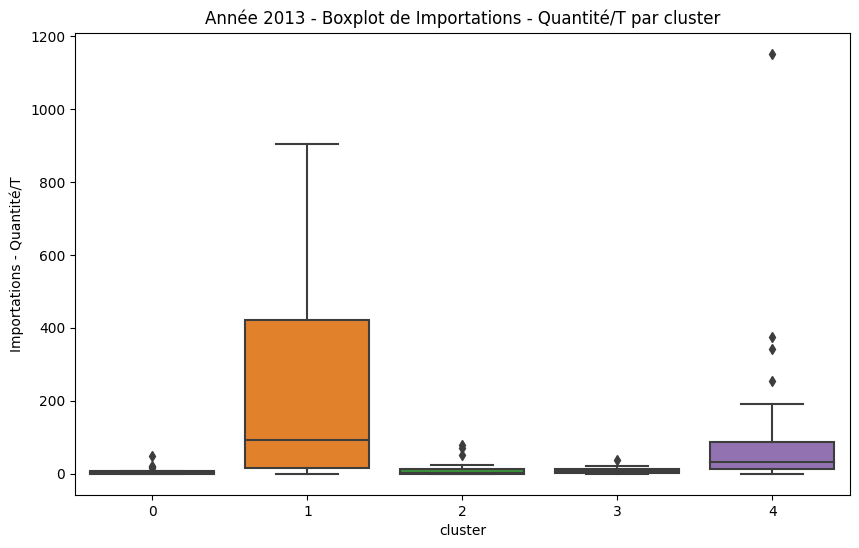

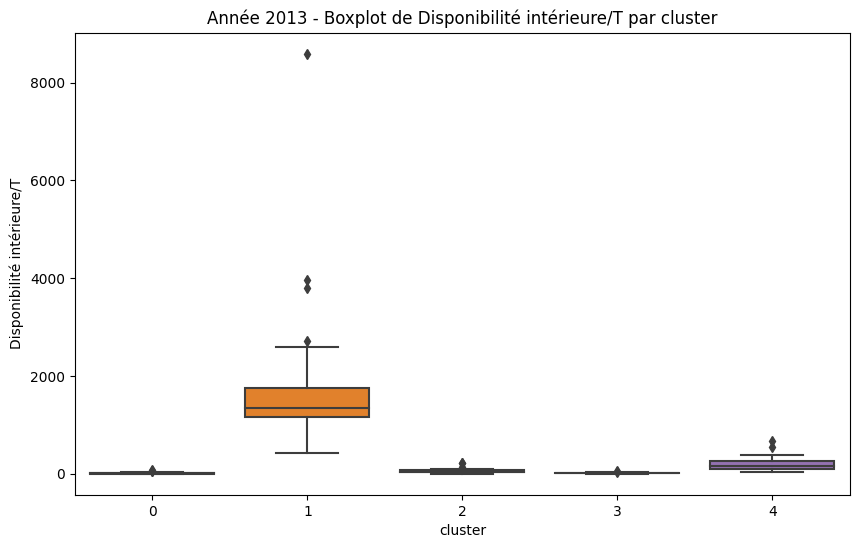

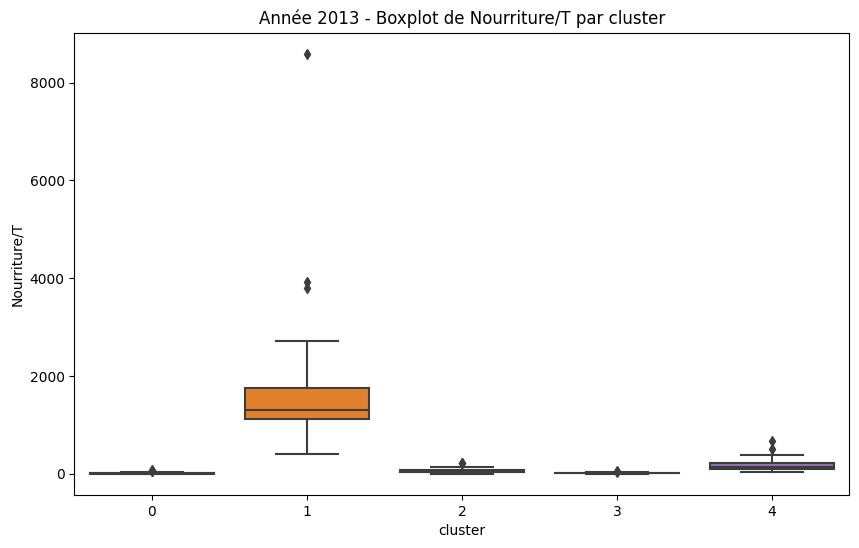

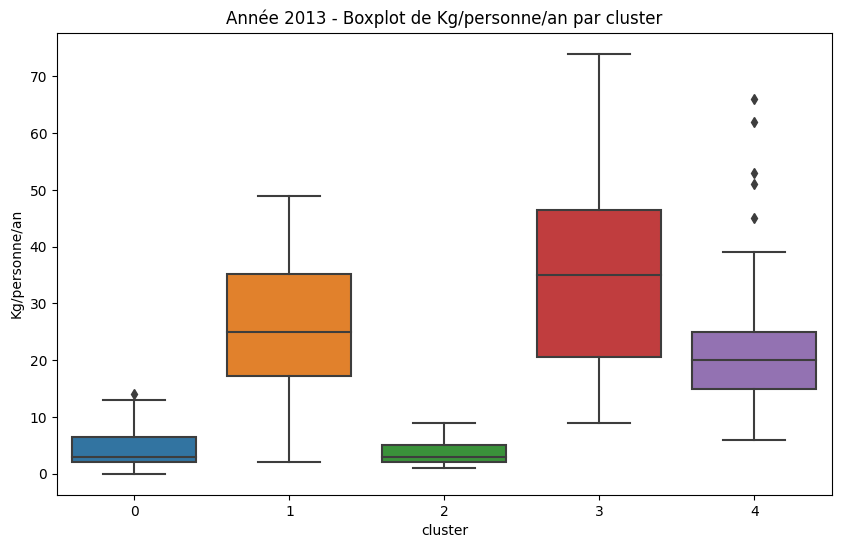

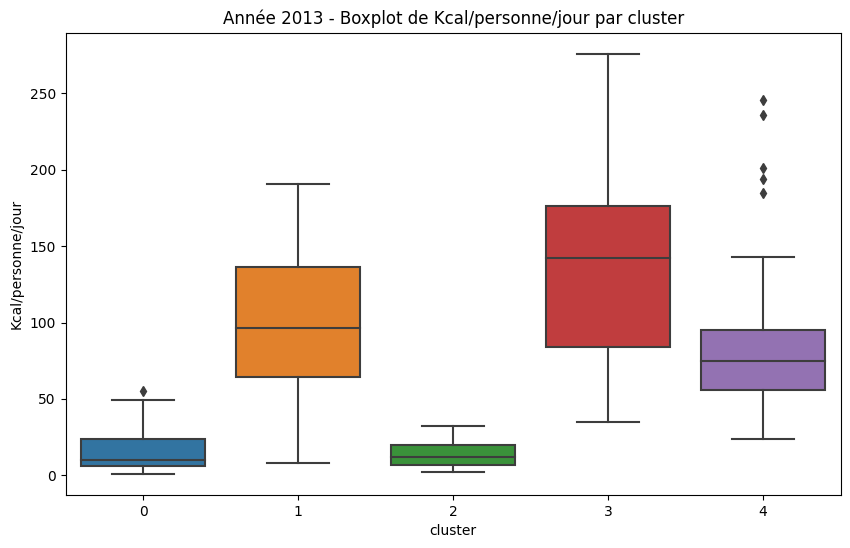

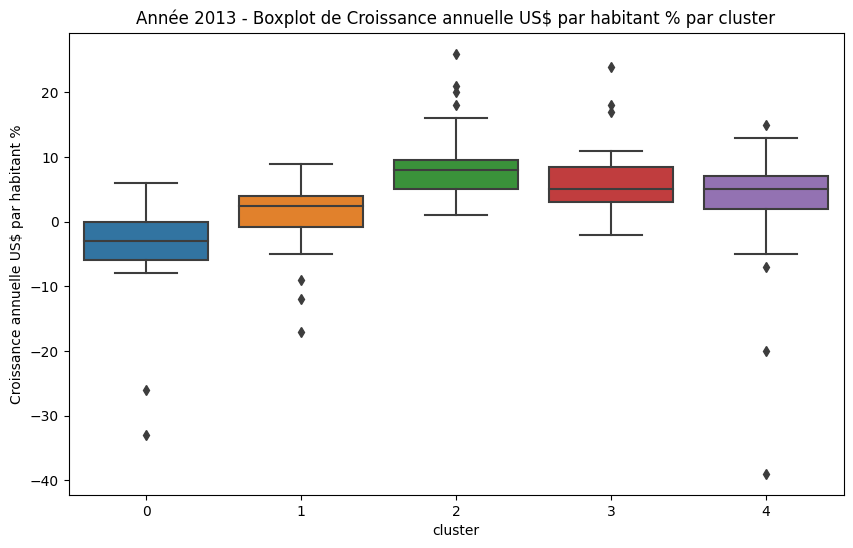

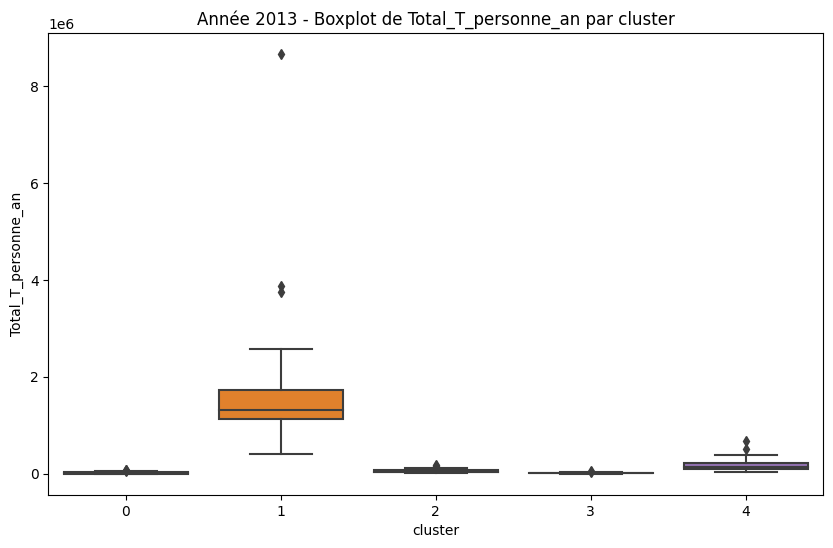

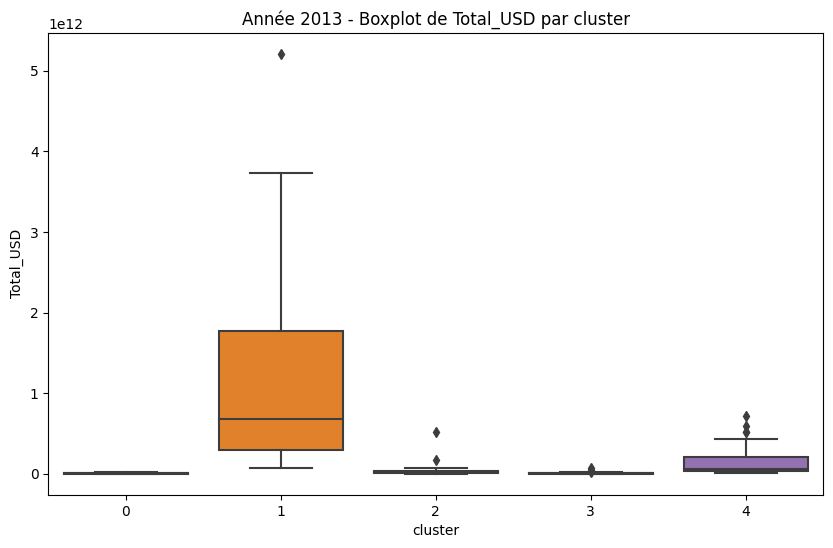


Analyse pour l'année 2014
Année 2014 - Cluster 0 - Centroïde: [1.16656466 0.84483139 1.17177272 1.16431664 1.13238126 1.15353516
 1.00380919 0.17578777 0.87773924 1.42404231 1.25697417]
Année 2014 - Cluster 1 - Centroïde: [0.52781283 0.11086244 0.46332432 0.46238671 0.28960457 0.26312651
 0.88980009 0.62878524 0.25058239 0.90878259 0.66554761]
Année 2014 - Cluster 2 - Centroïde: [0.27302986 0.48035536 0.32016854 0.31871229 0.54219994 0.54405025
 0.57225043 0.18966722 0.35110746 0.88589207 0.45206995]
Année 2014 - Cluster 3 - Centroïde: [0.14851762 0.31221287 0.18995565 0.17579294 1.21515159 1.23463603
 0.20429391 0.38210171 0.81799307 0.77098022 0.33066088]
Année 2014 - Cluster 4 - Centroïde: [0.62932366 0.65044575 0.63952545 0.63020718 1.0379988  1.05528908
 0.63615923 0.26573176 0.84498254 1.1032336  0.82363973]

Année 2014 - Cluster 0
['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Argentine', 'Australie', 'Brésil', 'Canada', 'Chili', 'Colombie', 'Égypte', 'Espagne', 'Fédératio

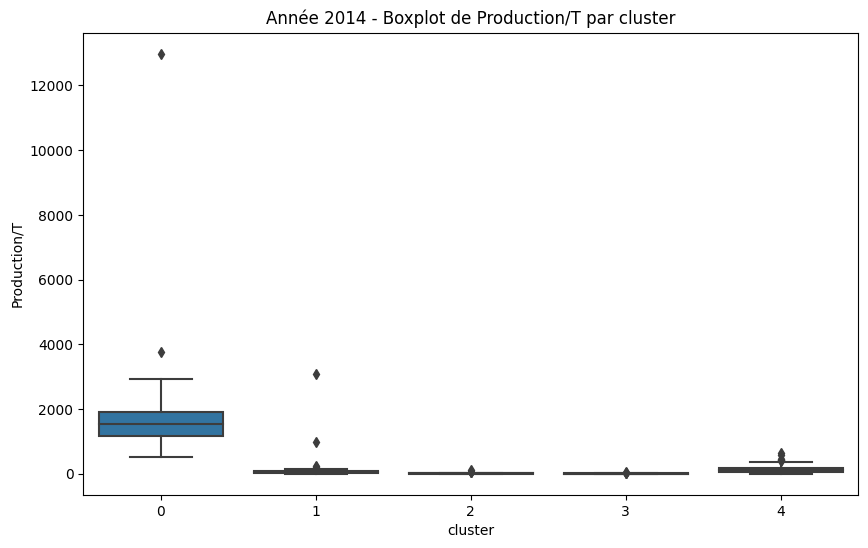

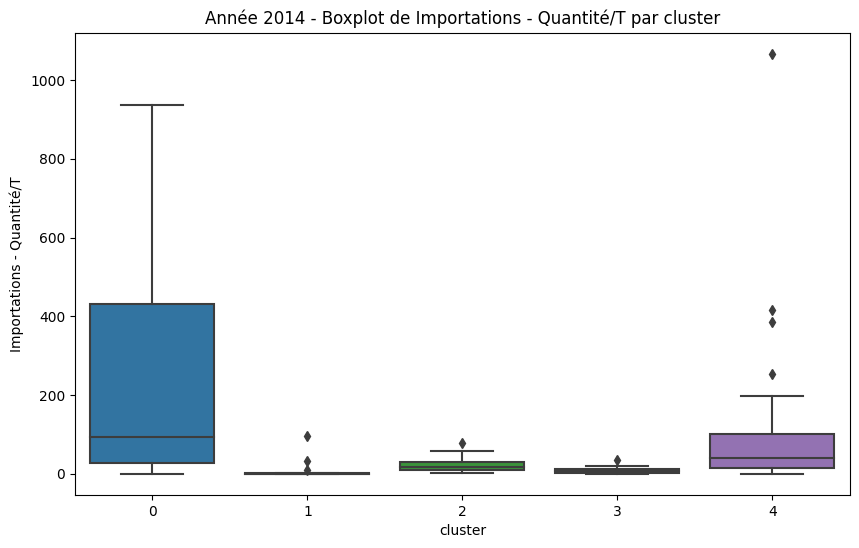

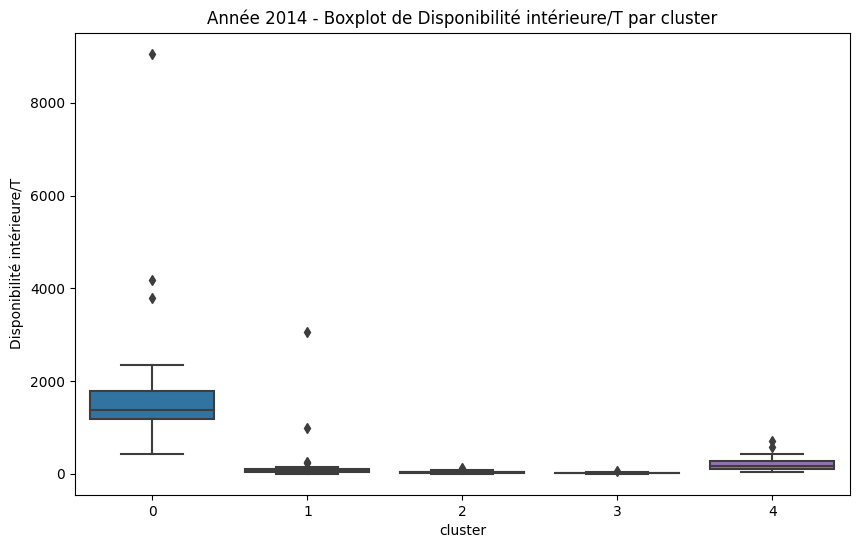

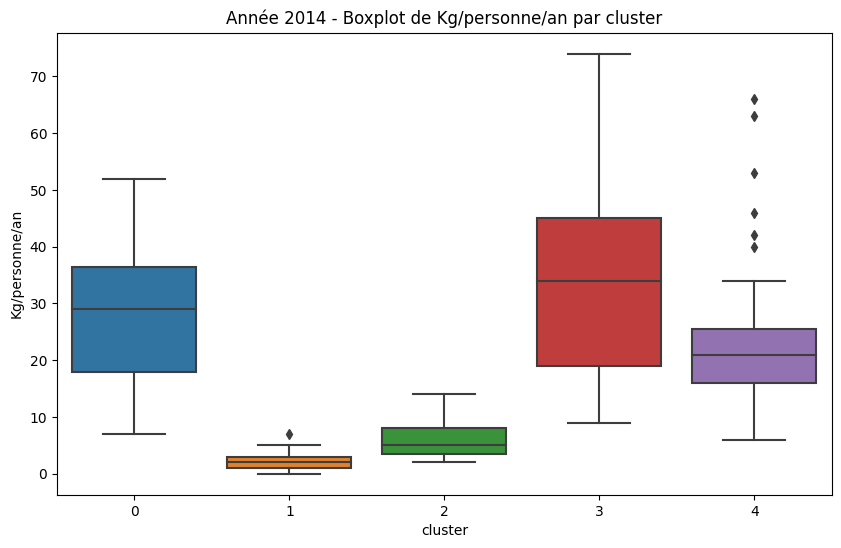

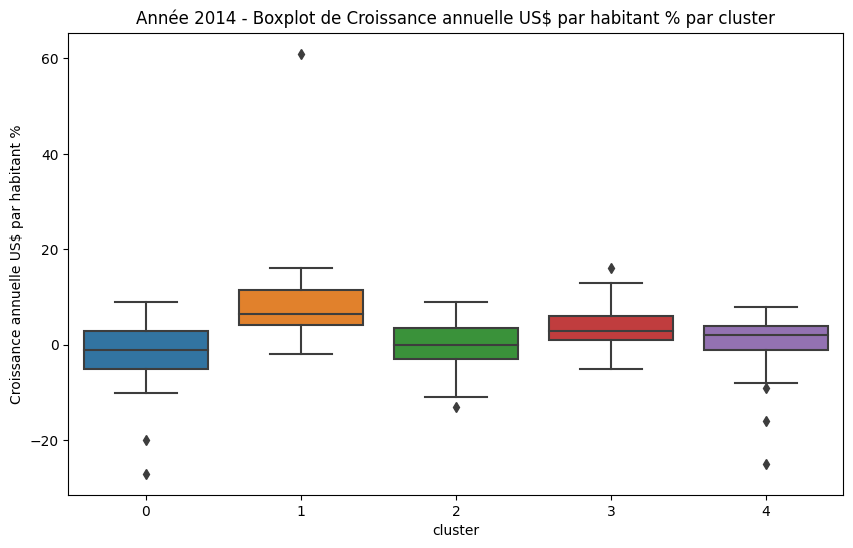

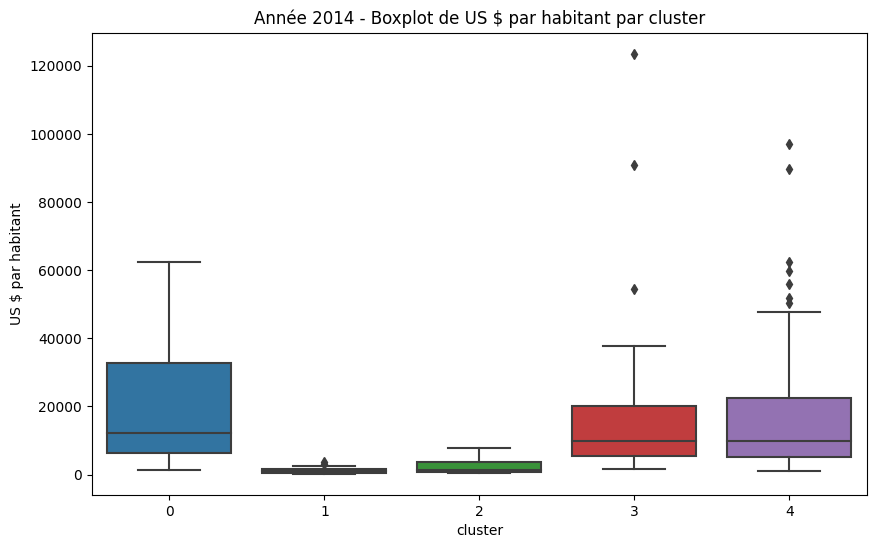


Analyse pour l'année 2015
Année 2015 - Cluster 0 - Centroïde: [0.55968678 0.70942323 0.57470833 0.56787319 1.00190844 1.02133253
 0.59989157 0.1241997  0.81793949 1.062082   0.76585575]
Année 2015 - Cluster 1 - Centroïde: [0.39034924 0.25360286 0.37057905 0.36937939 0.35532011 0.33351536
 0.74264524 0.21620405 0.25510345 0.87487935 0.54672495]
Année 2015 - Cluster 2 - Centroïde: [1.06522583 1.13890597 1.10121935 1.08697501 1.17053997 1.19117082
 0.93561809 0.00803265 0.97342316 1.3821486  1.24476617]
Année 2015 - Cluster 3 - Centroïde: [0.14137838 0.30913989 0.18925796 0.17370456 1.16831644 1.18698235
 0.21422868 0.12194108 0.77556221 0.76876545 0.31958053]
Année 2015 - Cluster 4 - Centroïde: [1.0723768  0.19038389 1.04707657 1.0442566  0.93329177 0.95219401
 1.00425509 0.17737004 0.59933644 1.35352434 1.053923  ]

Année 2015 - Cluster 0
['Albanie', 'Angola', 'Arménie', 'Autriche', 'Azerbaïdjan', 'Bélarus', 'Belgique', 'Bénin', 'Bosnie-Herzégovine', 'Bulgarie', 'Chine - RAS de Hong-Ko

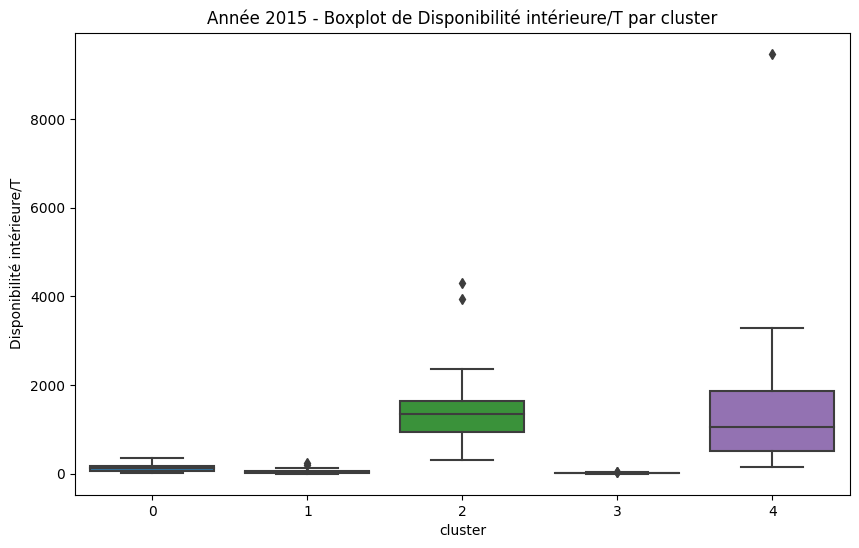

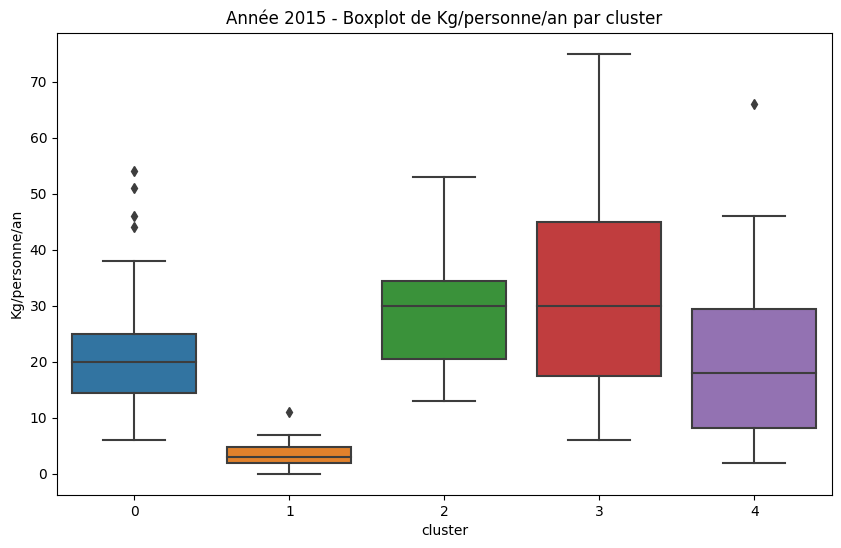

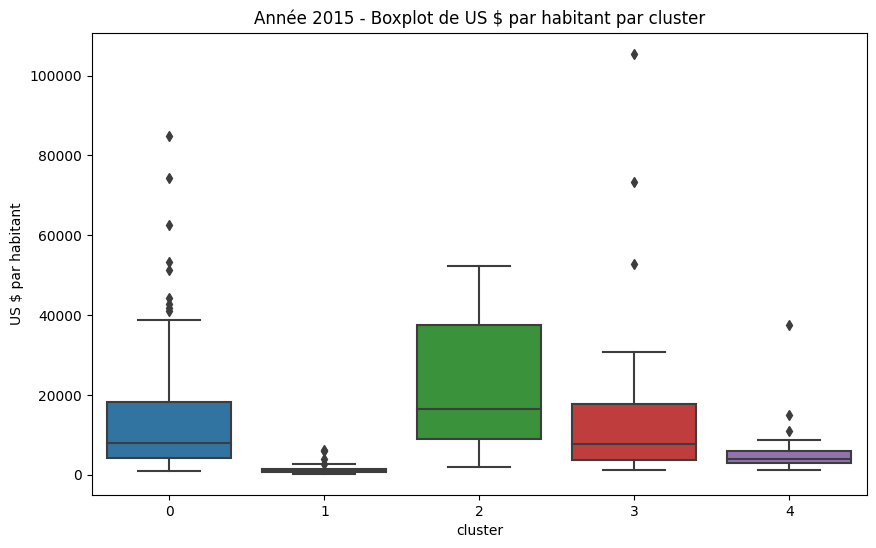


Analyse pour l'année 2016
Année 2016 - Cluster 0 - Centroïde: [0.4472458  0.16034113 0.40238573 0.40238573 0.33449465 0.3168956
 0.78659219 0.78218747 0.24546189 0.90449097 0.57107682]
Année 2016 - Cluster 1 - Centroïde: [0.64645407 0.68993797 0.6414141  0.62955239 1.07224334 1.09325171
 0.61272883 0.42186229 0.90732839 1.1019492  0.81900299]
Année 2016 - Cluster 2 - Centroïde: [0.39679201 0.45598889 0.42949289 0.42803466 0.51859795 0.52169541
 0.68499794 0.02949478 0.35285015 0.93045997 0.55509805]
Année 2016 - Cluster 3 - Centroïde: [1.14600316 0.80105956 1.16281198 1.15616594 1.05201548 1.07024069
 1.02357038 0.30114993 0.80717504 1.42100075 1.21159288]
Année 2016 - Cluster 4 - Centroïde: [0.15269376 0.34369126 0.20090766 0.18564356 1.13797909 1.15983224
 0.22565681 0.62095179 0.79272731 0.78001233 0.33333125]

Année 2016 - Cluster 0
['Bangladesh', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodge', 'Cameroun', "Côte d'Ivoire", 'Éthiopie', 'Gambie', 'Ghana', 'Guinée-Bissau', 'Kenya'

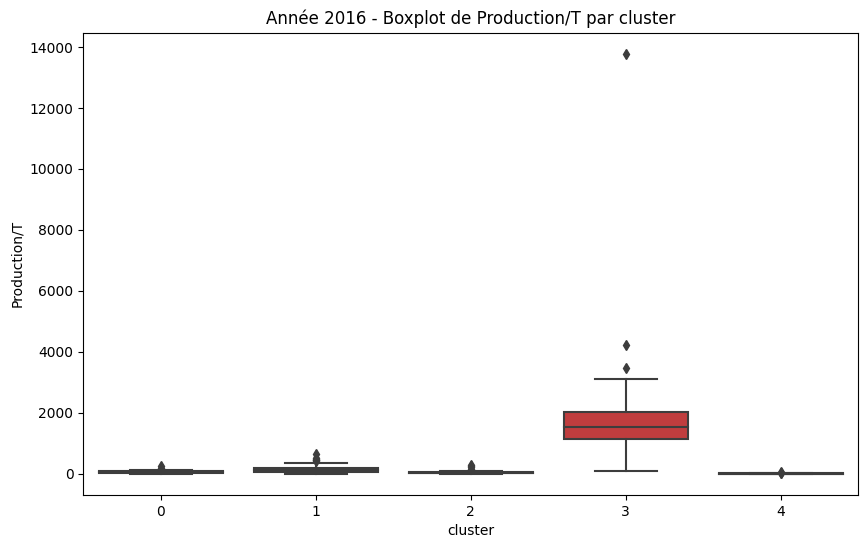

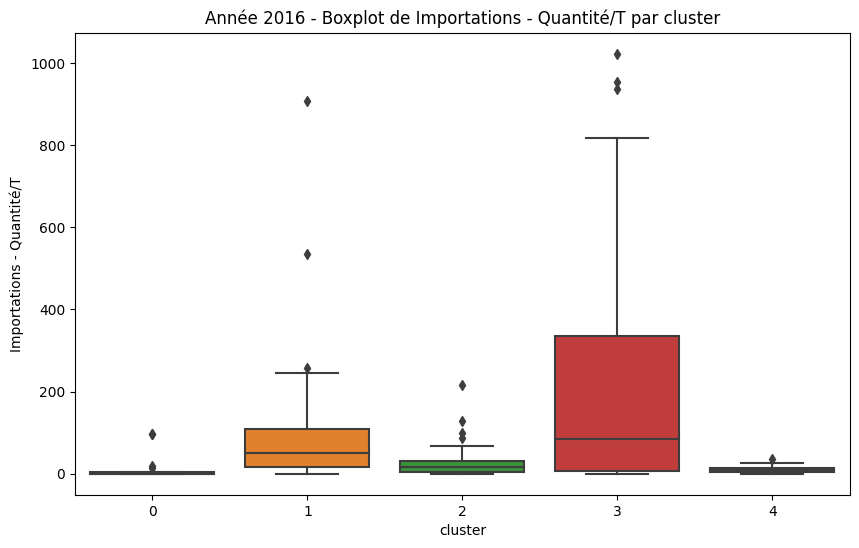

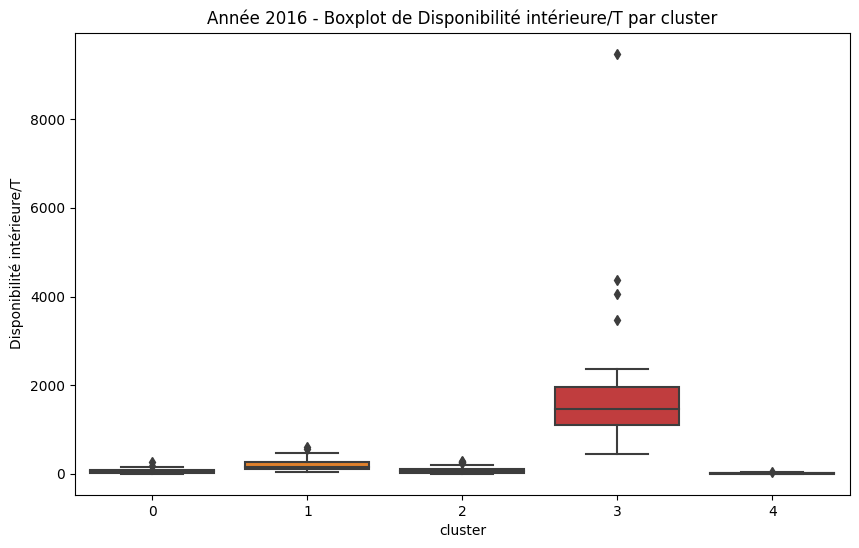

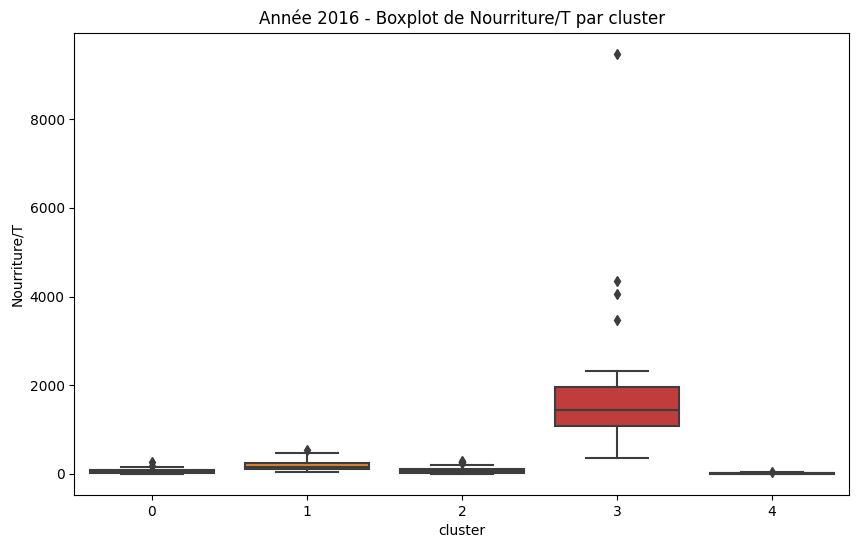

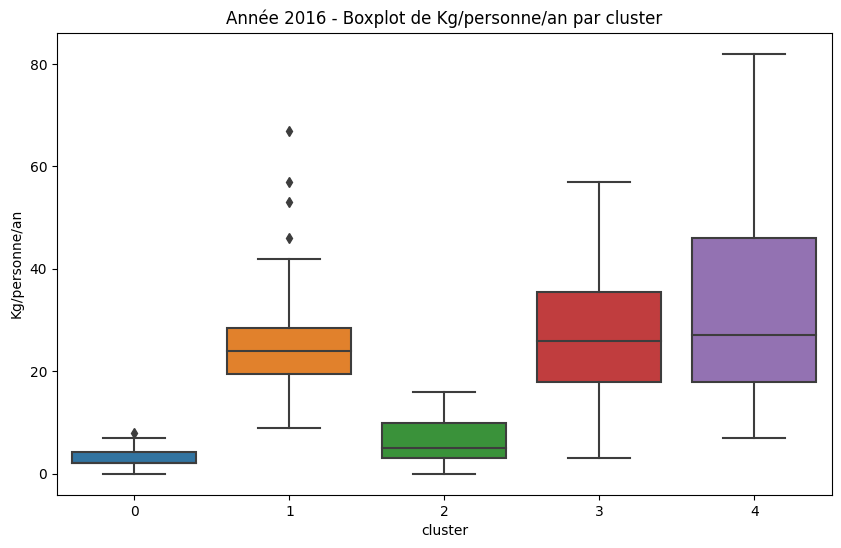

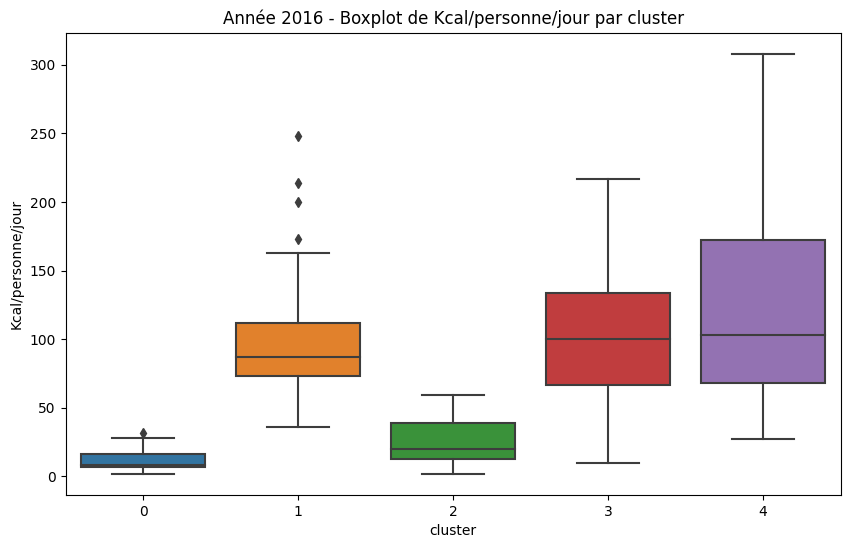

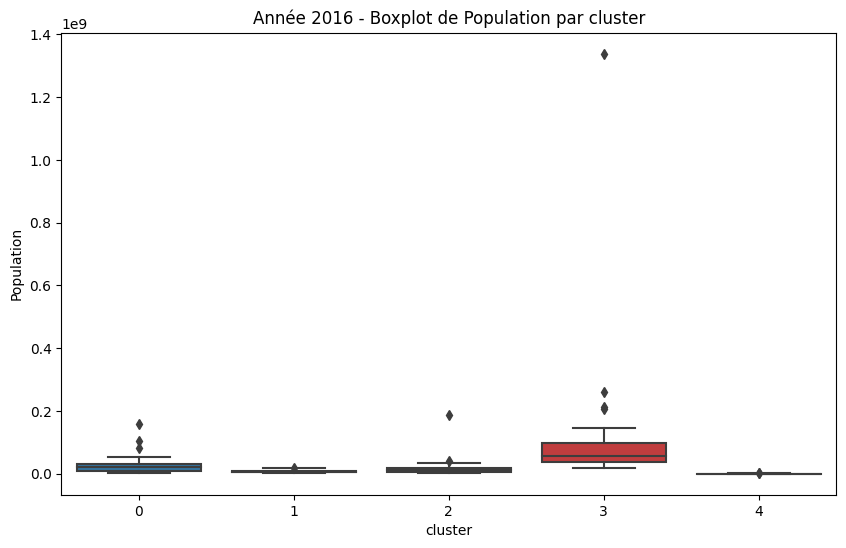

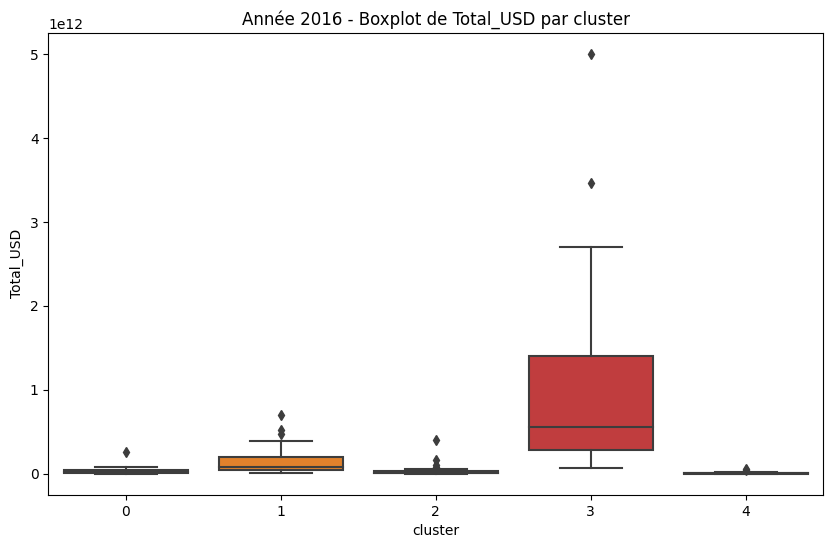


Analyse pour l'année 2017
Année 2017 - Cluster 0 - Centroïde: [1.01081496 0.11859395 0.97080367 0.96767451 0.85279751 0.85747909
 0.98647287 0.57478    0.57313803 1.31466862 1.01586302]
Année 2017 - Cluster 1 - Centroïde: [0.57045872 0.7131493  0.58562063 0.57744747 1.00047397 1.02647358
 0.60216023 0.80445457 0.82712176 1.06744298 0.77081232]
Année 2017 - Cluster 2 - Centroïde: [0.39973306 0.2999472  0.38417582 0.38065308 0.35641249 0.349875
 0.74272435 0.55985224 0.23364047 0.87523128 0.53368616]
Année 2017 - Cluster 3 - Centroïde: [1.13248168 1.06247506 1.14819067 1.14284842 1.14114975 1.16834268
 0.98211283 0.7402098  0.90610855 1.41402167 1.24902806]
Année 2017 - Cluster 4 - Centroïde: [0.14285848 0.32713161 0.19186719 0.17821192 1.17008198 1.19603947
 0.21397317 0.61448244 0.77432666 0.77283408 0.316269  ]

Année 2017 - Cluster 0
['Algérie', 'Bangladesh', 'Bolivie (État plurinational de)', 'Équateur', 'Inde', 'Indonésie', "Iran (République islamique d')", 'Israël', 'Maroc', 'Mya

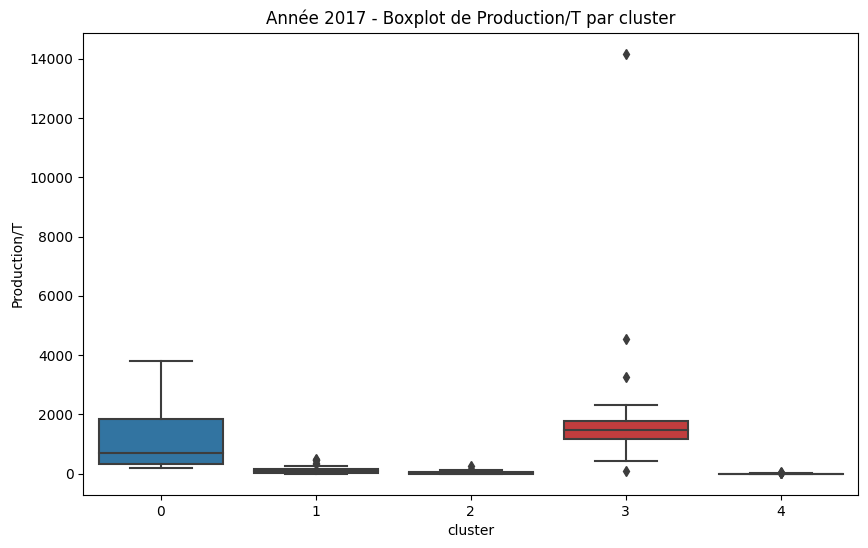

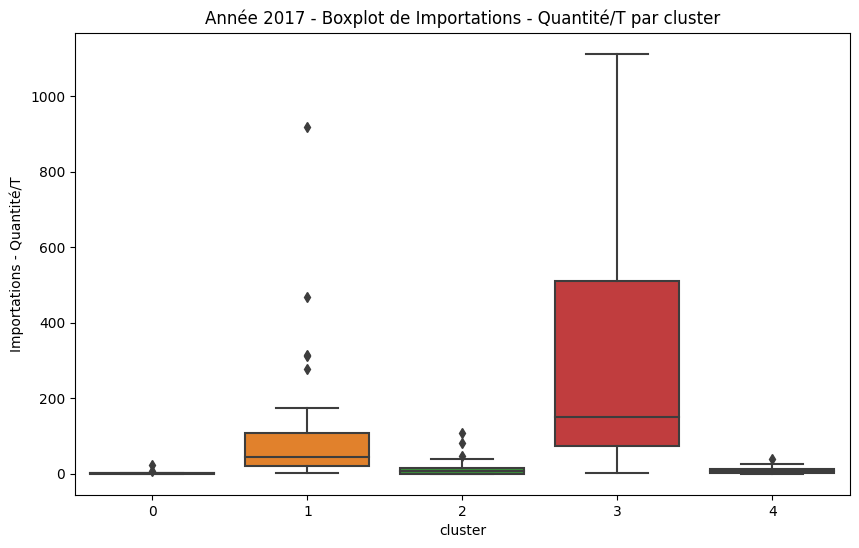

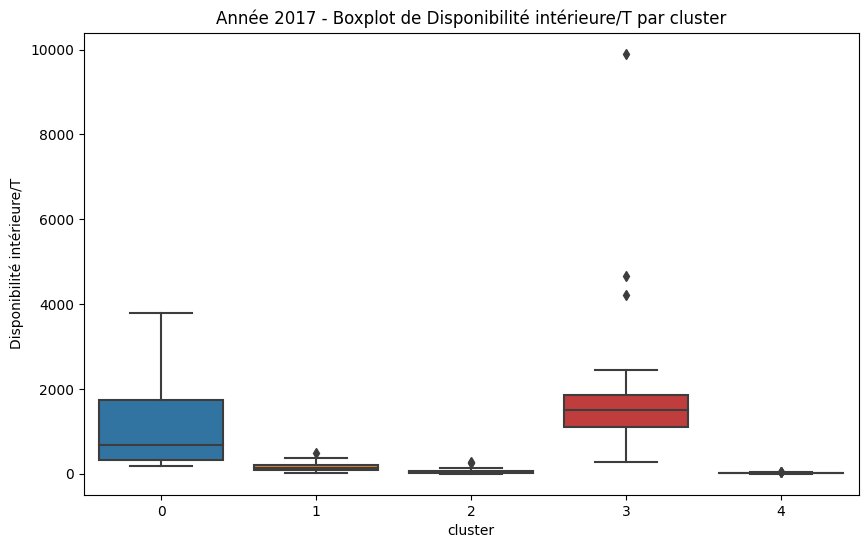

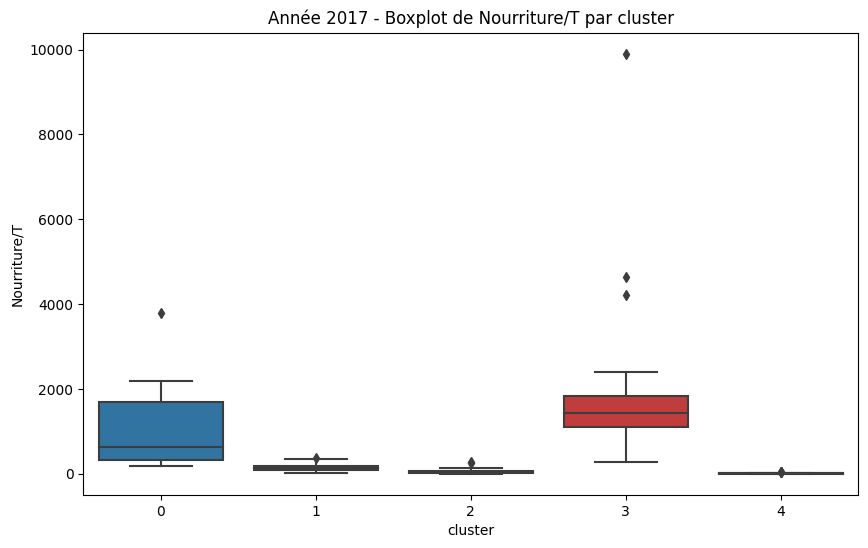

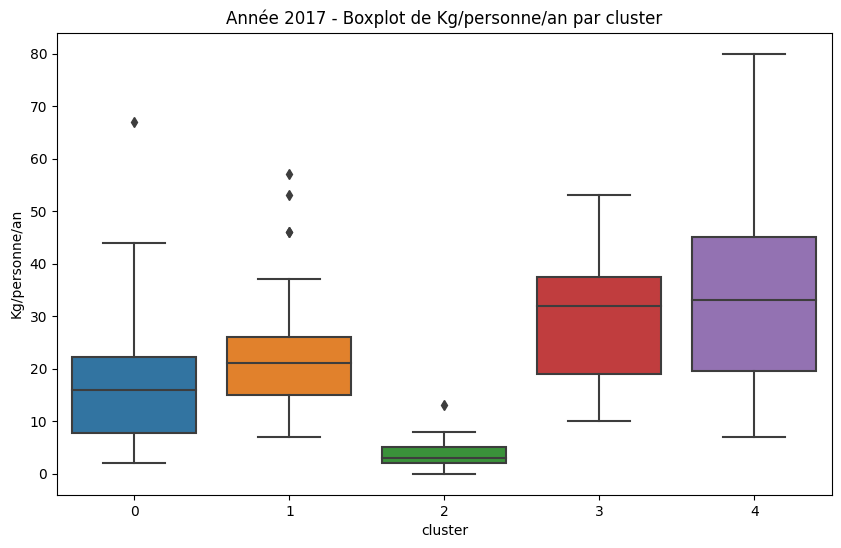

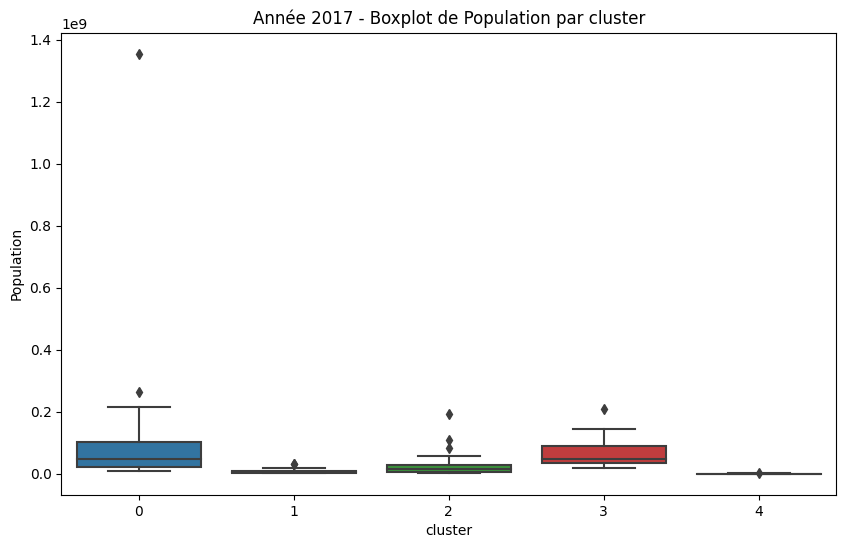

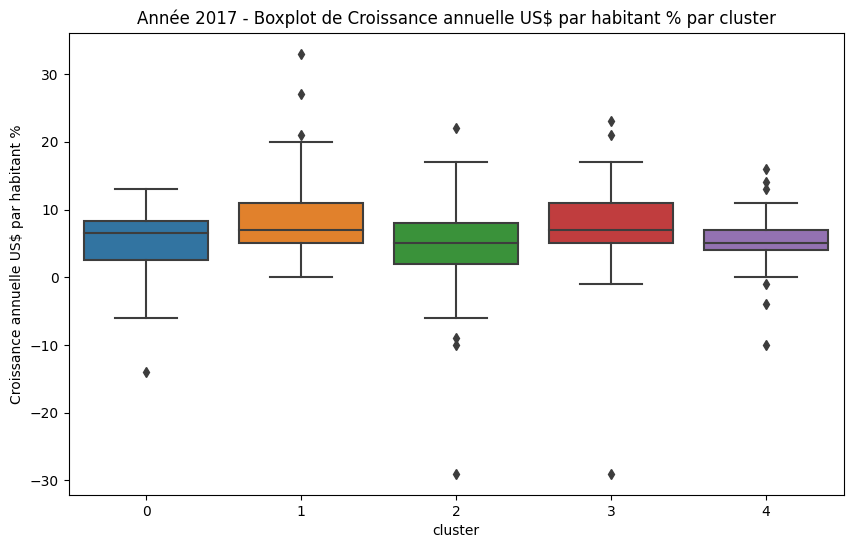

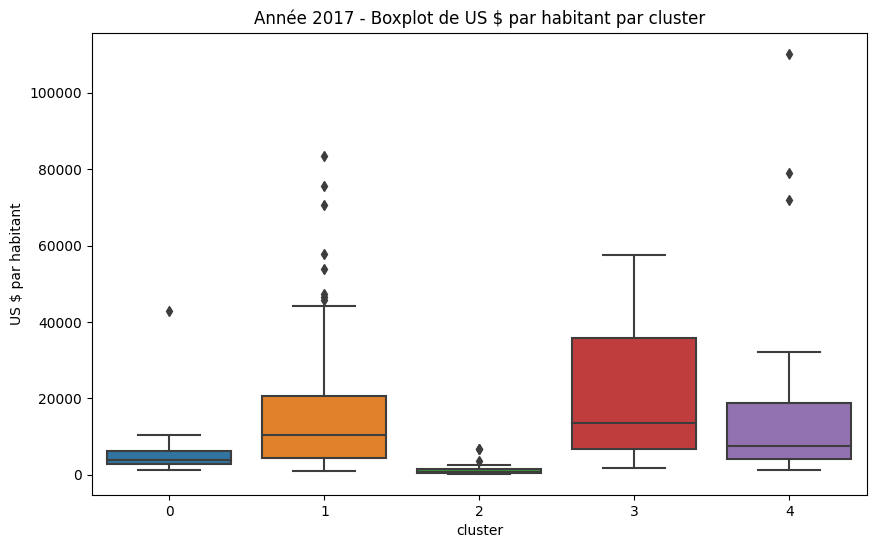

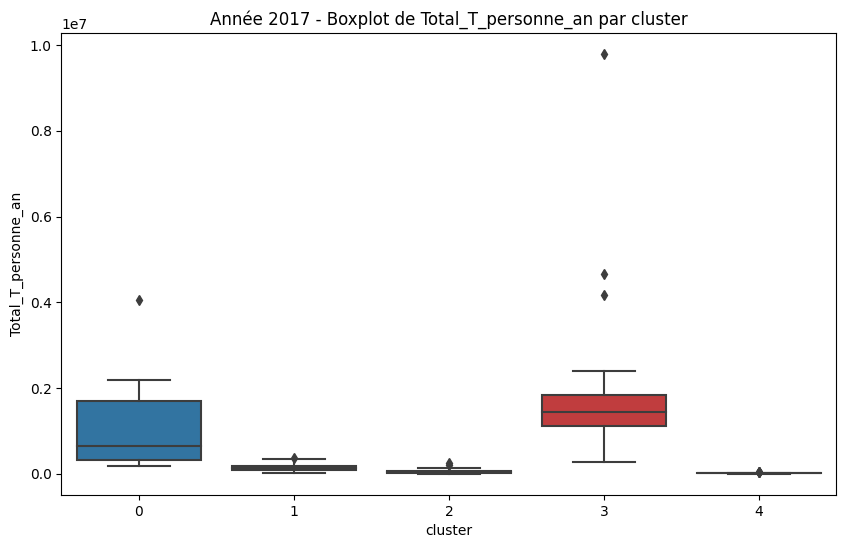

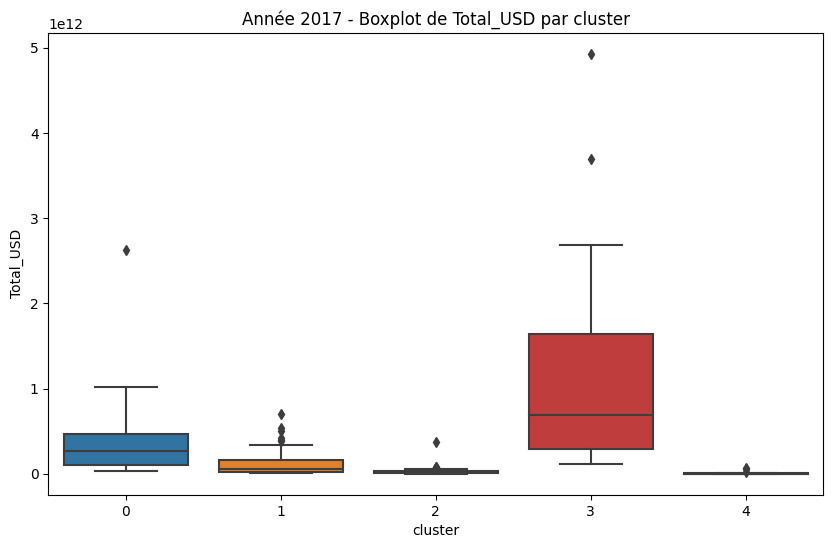


Analyse pour l'année 2018
Année 2018 - Cluster 0 - Centroïde: [0.13143238 0.33076744 0.18581608 0.17091736 1.21719319 1.23697699
 0.19710186 0.50374629 0.79332743 0.76507644 0.30447512]
Année 2018 - Cluster 1 - Centroïde: [1.08934948 1.19096588 1.11874801 1.10277113 1.11149783 1.13570949
 0.96561499 0.77747551 0.92270791 1.38759937 1.24396751]
Année 2018 - Cluster 2 - Centroïde: [0.55921856 0.73726604 0.58512293 0.57988932 1.02133315 1.03913305
 0.5989822  0.74539931 0.82003009 1.06764985 0.76321535]
Année 2018 - Cluster 3 - Centroïde: [0.40340865 0.27486683 0.38849346 0.38784905 0.36851942 0.36290227
 0.74264704 0.58418263 0.25697272 0.87956853 0.54549671]
Année 2018 - Cluster 4 - Centroïde: [1.04123521 0.14841292 0.99708551 0.98888588 0.98438693 0.99643716
 0.93624694 0.25047931 0.66198799 1.32126534 1.02775059]

Année 2018 - Cluster 0
['Antigua-et-Barbuda', 'Bahamas', 'Barbade', 'Belize', 'Cabo Verde', 'Chine - RAS de Macao', 'Comores', 'Dominique', 'Fidji', 'Grenade', 'Guyana', 'Î

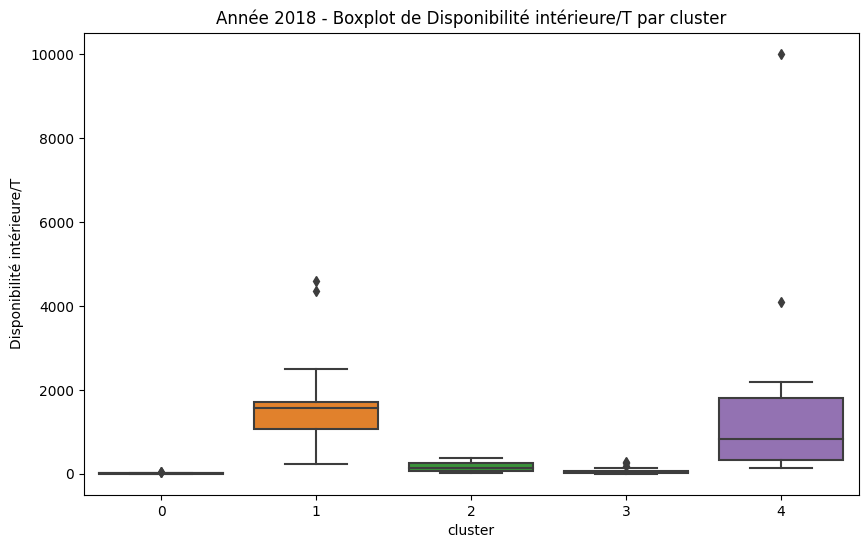

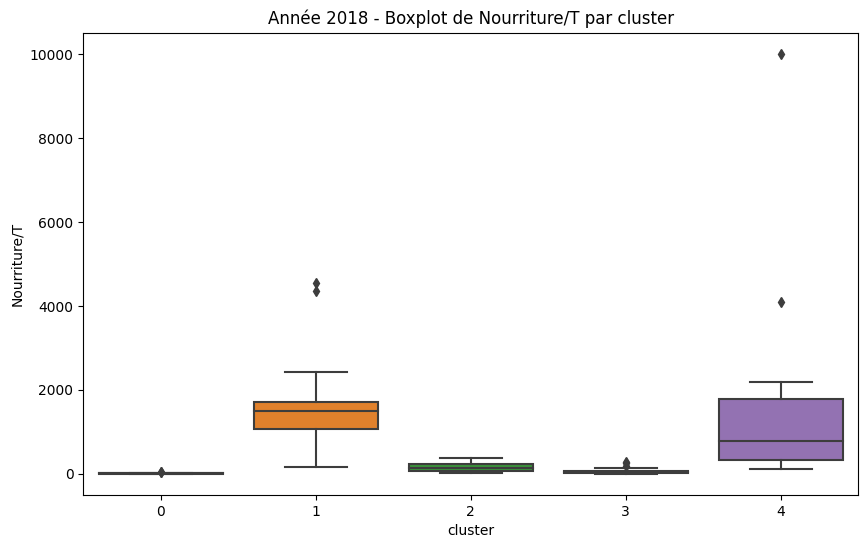

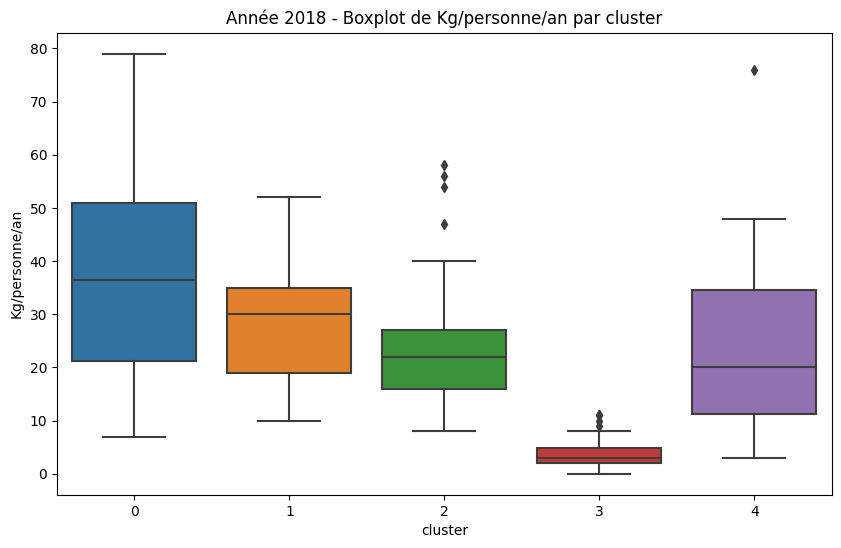

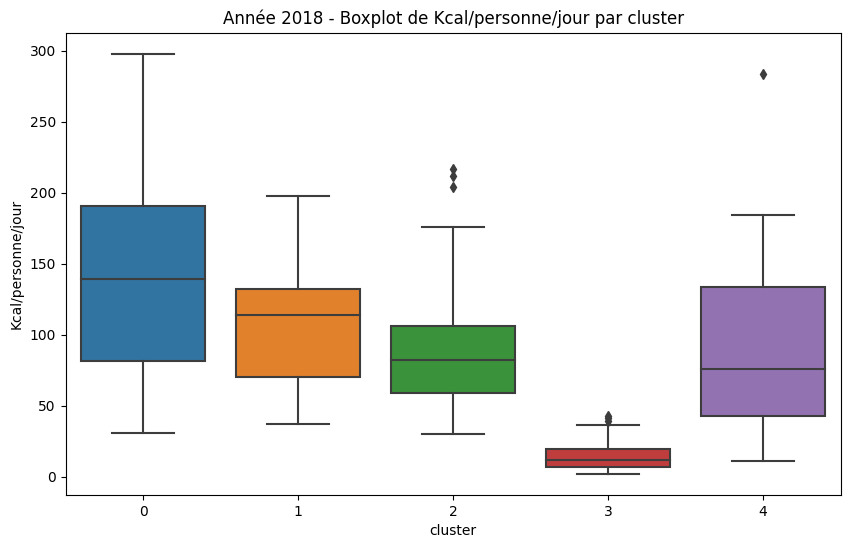

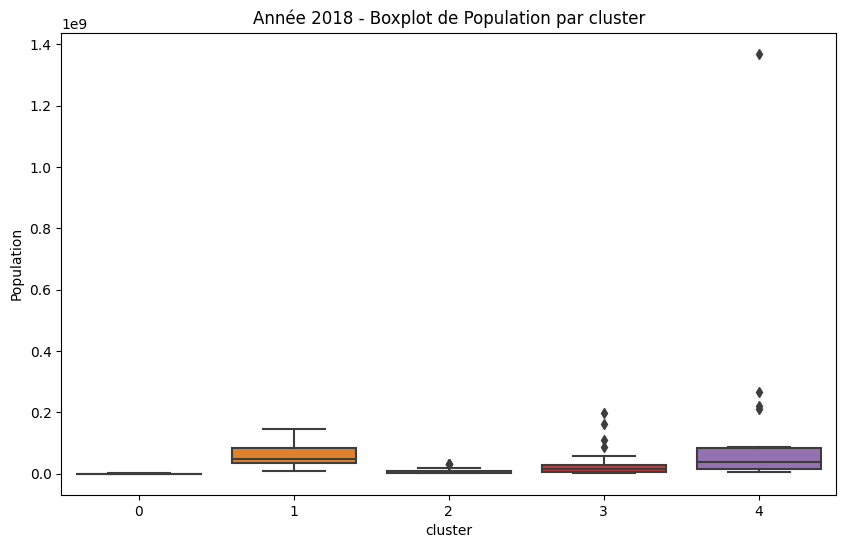

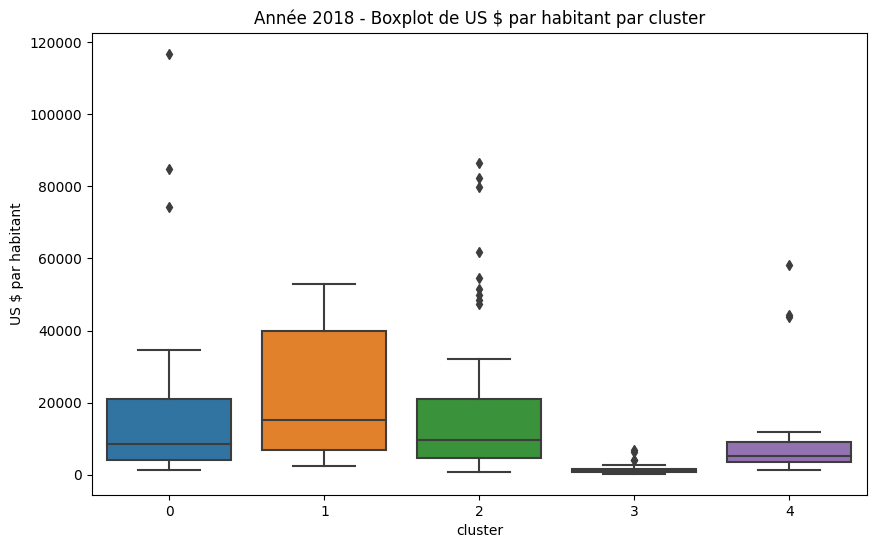

In [5]:
# Liste des années à analyser
years = df_methode['Année'].unique()
warnings.filterwarnings('ignore')

# Liste des années à analyser
years = df_methode['Année'].unique()
transition_matrix = {}
# Boucle sur chaque année pour l'analyse
for year in years:
    print(f"\nAnalyse pour l'année {year}")

    # Filtrer les données pour l'année sélectionnée
    df_year = df_methode[df_methode['Année'] == year]

    # Sélectionnez des caractéristiques pour cette année spécifique
    colonnes_numeriques = ['Production/T', 'Importations - Quantité/T', 'Disponibilité intérieure/T', 'Nourriture/T', 'Kg/personne/an', 'Kcal/personne/jour', 'Population', 'Croissance annuelle US$ par habitant %', 'US $ par habitant', 'Total_T_personne_an', 'Total_USD']
    selection = df_year[colonnes_numeriques]

    # Assurez-vous que toutes les valeurs sont positives
    selection = selection.applymap(lambda x: max(x, 0))

    # Appliquer la transformation logarithmique
    selection_log = np.log1p(selection)

    # Appliquer RobustScaler ou MinMaxScaler
    scaler = MinMaxScaler() 
    X_scaled = scaler.fit_transform(selection_log)

    # K-Means pour chaque année
    kmeans = KMeans(n_clusters=5)
    df_year['cluster'] = kmeans.fit_predict(X_scaled)

    # Calculer et afficher les centroïdes pour chaque année
    centroids = kmeans.cluster_centers_
    for i, centroid in enumerate(centroids):
        print(f"Année {year} - Cluster {i} - Centroïde: {np.expm1(centroid)}")  # Use expm1 to invert log1p

    # Afficher les noms des zones pour chaque cluster pour cette année
    for i in range(kmeans.n_clusters):
        print(f"\nAnnée {year} - Cluster {i}")
        print(df_year[df_year['cluster'] == i]['Zone'].tolist())
        
    # Affichez les boxplots pour chaque colonne par cluster pour cette année
    for colonne in colonnes_numeriques:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='cluster', y=colonne, data=df_year)
        plt.title(f'Année {year} - Boxplot de {colonne} par cluster')
        plt.show()

    transition_matrix[year] = df_year[['Zone', 'cluster']]
    # Créer une matrice de transition pour les années consécutives
for i in range(len(years) - 1):
    year1, year2 = years[i], years[i + 1]
    # Fusionner les données de deux années consécutives sur la 'Zone'
    merged = pd.merge(transition_matrix[year1], transition_matrix[year2], on='Zone', suffixes=(year1, year2))
    
    # Compter les transitions de cluster entre ces deux années
    count_transitions = pd.crosstab(merged[f'cluster{year1}'], merged[f'cluster{year2}'])

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.4 - Réalisation des groupes de cluster avec le centroid en comparent la distance euclidienne    </h3>
</div>

In [6]:
# Il calcule la ressemblance entre chaque groupe de l'année courante et ceux de 2010 (cluster reference) en trouvant le groupe de 2010 le plus proche en termes de distance euclidienne. 
# Ensuite, il assigne à chaque donnée de l'année courante le groupe de référence de 2010 le plus similaire, permettant ainsi de comparer les groupes au fil des années sur une base commune.

df_2010 = df_methode[df_methode['Année'] == 2010]
kmeans_2010 = KMeans(n_clusters=5, random_state=42)
df_2010['cluster_reference'] = kmeans_2010.fit_predict(df_2010[colonnes_numeriques])

# Initialiser le DataFrame de suivi
clusters_tracking = df_2010[['Zone', 'cluster_reference']]

# Utiliser votre code existant pour créer les clusters pour chaque année
for year in range(2011, 2019):
    df_year = df_methode[df_methode['Année'] == year]
    # Votre code de clustering ici...
    kmeans = KMeans(n_clusters=5, random_state=42)
    df_year['cluster'] = kmeans.fit_predict(df_year[colonnes_numeriques])

    # Mappage des clusters avec ceux de 2010
    clusters_mapping = {i: np.argmin([np.linalg.norm(center - centroid) for centroid in kmeans_2010.cluster_centers_]) for i, center in enumerate(kmeans.cluster_centers_)}
    df_year['cluster_mapped'] = df_year['cluster'].map(clusters_mapping)

    # Fusionner les clusters mappés dans le DataFrame de suivi
    clusters_tracking = clusters_tracking.merge(df_year[['Zone', 'cluster_mapped']], on='Zone', how='left').rename(columns={'cluster_mapped': f'cluster_{year}'})

# Affichage du DataFrame final
print(clusters_tracking)


                                       Zone  cluster_reference  cluster_2011  \
0                               Afghanistan                  0             0   
1                            Afrique du Sud                  3             3   
2                                   Albanie                  0             0   
3                                   Algérie                  0             0   
4                                 Allemagne                  1             1   
..                                      ...                ...           ...   
167  Venezuela (République bolivarienne du)                  3             3   
168                                Viet Nam                  0             0   
169                                   Yémen                  0             0   
170                                  Zambie                  0             0   
171                                Zimbabwe                  0             0   

     cluster_2012  cluster_2013  cluste

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.4 - Création du diagramme de Sankey    </h3>
</div>

In [7]:
import plotly.graph_objects as go

# Initialiser les listes pour les données du diagramme de Sankey
sources = []
targets = []
values = []

# Créer des étiquettes pour les nœuds (clusters pour chaque année)
labels = []
for year in range(2010, 2019):
    labels.extend([f"Cluster {i} ({year})" for i in range(5)])

# Remplir les listes sources, targets et values
for year in range(2011, 2019):
    for index, row in clusters_tracking.iterrows():
        source_cluster = row['cluster_reference']
        target_cluster = row[f'cluster_{year}']
        if pd.notna(target_cluster):
            # Ajouter les transitions aux listes
            sources.append(labels.index(f"Cluster {source_cluster} (2010)"))
            targets.append(labels.index(f"Cluster {target_cluster} ({year})"))
            values.append(1)  # Chaque transition compte pour 1

# Création du diagramme de Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=labels
    ),
    link=dict(
      source=sources,
      target=targets,
      value=values
    ))])

fig.update_layout(title_text="Evolution des Clusters par Année par Rapport à 2010", font_size=10)
fig.show()


In [8]:
# Initialiser les listes pour les données du diagramme de Sankey
sources = []
targets = []
values = []
labels = []

# Ajouter des étiquettes pour chaque cluster dans chaque année
for year in years:
    for cluster in range(kmeans.n_clusters):
        labels.append(f"{year} - Cluster {cluster}")

# Remplir les listes sources, targets et values à partir de count_transitions
# Se concentrer uniquement sur les transitions impliquant le cluster 3
for i in range(len(years) - 1):
    year1, year2 = years[i], years[i + 1]
    for cluster1 in range(kmeans.n_clusters):
        for cluster2 in range(kmeans.n_clusters):
            if cluster1 == 3 or cluster2 == 3:  # Filtre pour inclure uniquement les transitions impliquant le cluster 2
                count = count_transitions.loc[cluster1, cluster2]
                if count > 0:
                    source_idx = labels.index(f"{year1} - Cluster {cluster1}")
                    target_idx = labels.index(f"{year2} - Cluster {cluster2}")
                    sources.append(source_idx)
                    targets.append(target_idx)
                    values.append(count)

# Création du diagramme de Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=labels,
    ),
    link=dict(
      source=sources,
      target=targets,
      value=values
    ))])

fig.update_layout(title_text="Evolution du Cluster 3 par Année", font_size=10)
fig.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.4 - les Meilleur pays dans chaque colonne     </h3>
</div>

In [9]:
# Sélection des pays du cluster 3 pour chaque année
pays_cluster_3 = clusters_tracking[clusters_tracking.filter(like='cluster_').isin([3]).any(axis=1)]['Zone']

# Filtrer le DataFrame original pour inclure uniquement ces pays
df_cluster_3 = df_methode[df_methode['Zone'].isin(pays_cluster_3)]

# Calculer les moyennes des caractéristiques pour ces pays
moyennes = df_cluster_3.groupby('Zone')[colonnes_numeriques].mean()

# Pour chaque colonne numérique, calculer et afficher le top 10
for colonne in colonnes_numeriques:
    # Trier le DataFrame pour la colonne actuelle et obtenir le top 10
    top_pays = moyennes.sort_values(by=colonne, ascending=False).head(10)
    
    # Afficher les résultats pour cette colonne
    print(f"Top 10 pour {colonne}:\n{top_pays[[colonne]]}\n")




Top 10 pour Production/T:
                                Production/T
Zone                                        
Indonésie                        2216.888889
Iran (République islamique d')   2004.777778
Argentine                        1986.777778
Turquie                          1884.333333
Pologne                          1857.000000
Afrique du Sud                   1635.000000
Thaïlande                        1613.222222
Malaisie                         1520.444444
Colombie                         1331.555556
Philippines                      1147.888889

Top 10 pour Importations - Quantité/T:
                                        Importations - Quantité/T
Zone                                                             
Chine - RAS de Hong-Kong                              1034.111111
Arabie saoudite                                        805.111111
Pays-Bas (Royaume des)                                 579.222222
Émirats arabes unis                                    439.77777

In [10]:
sns.pairplot(df_year,size=2.5)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">utilisation de ACP  </h3>
</div>

In [11]:
# fonction pour afficher les composantes principales
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_* 100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

Nombre de composantes calculées :  11


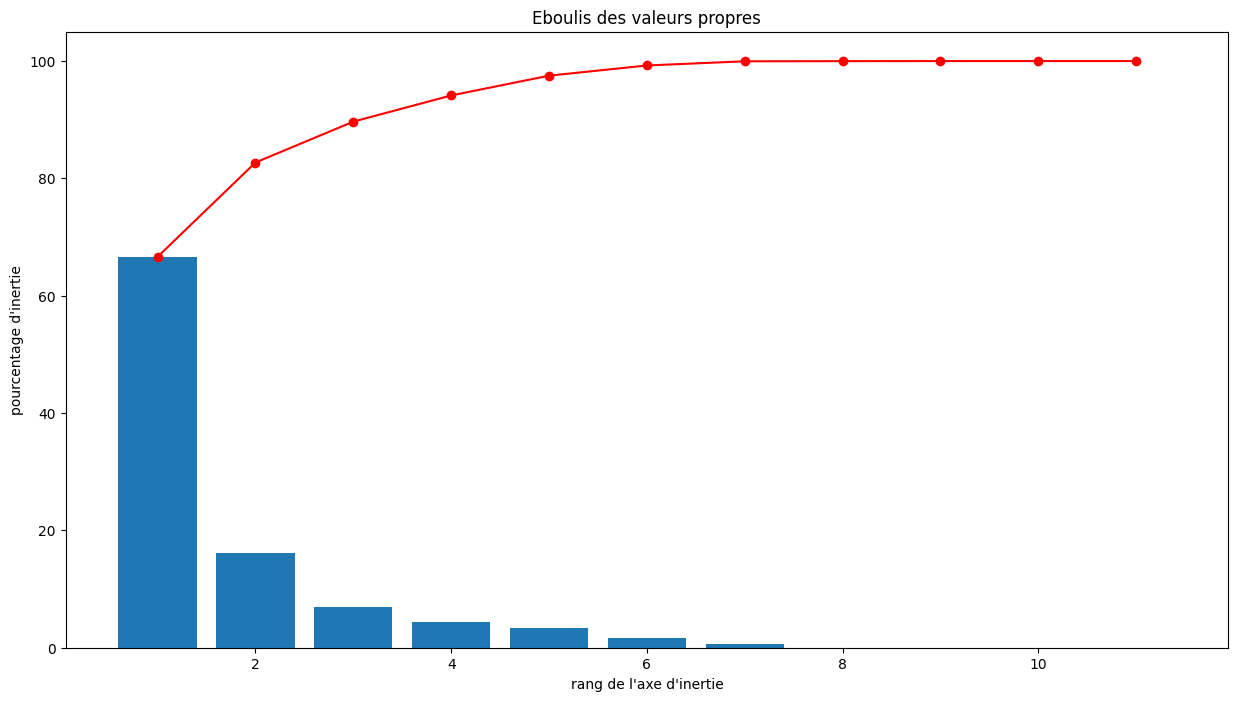

In [12]:
# Sélectionnez des caractéristiques numériques pour la transformation logarithmique
df_acp_log = df_log

# Appliquez PCA sur les données transformées
n_comp = min(11, len(df_acp_log.columns))  # Le nombre de composantes est le minimum entre 11 et le nombre de colonnes
pca_etat = PCA(n_components=n_comp)
pca_etat.fit(df_acp_log)

# Afficher le nombre de composantes calculées
print('Nombre de composantes calculées : ', pca_etat.n_components_)

# Eboulis des valeurs propres
plt.figure(figsize=(15, 8))
display_scree_plot(pca_etat)

In [13]:
#appliquer l'acp pour avoir 4 composant du moment que 4 composants nous permettent d'avoir 90% de l'information
pca = PCA(n_components=4).fit(df_acp_log)
Xk_projected = pca.transform(df_acp_log)

In [14]:
# dessiner les projections de x_scaled sur les 4 composantes qu'on a trouvé en utilisant acp 
sns.scatterplot(data=Xk_projected, x=Xk_projected[:, 0], y=Xk_projected[:,1], alpha=1)

<Axes: >

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.6 - Réalisation du cercle de correlation     </h3>
</div>

In [15]:
#cette fonction dessine le cercle de correlation 
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

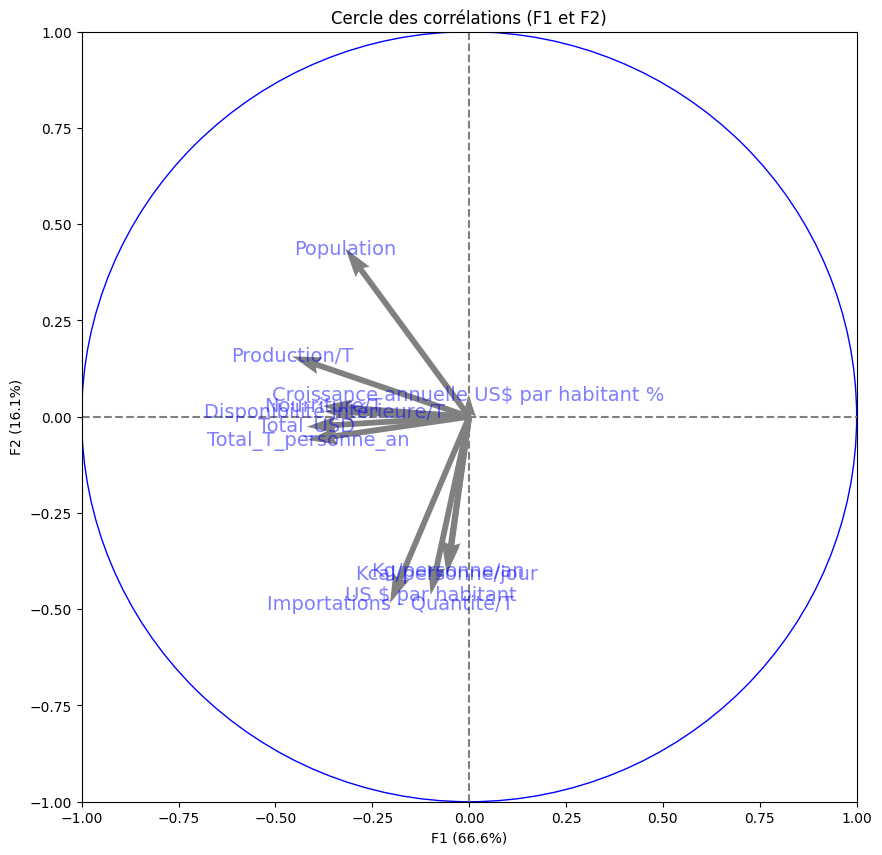

In [16]:
#utiliser la fonction display_circles() pour dessiner le cercle de correlation des 4 composantes
index = df_log.index 
features = df_log.columns
choix_n_comp=4
pcs = pca.components_
display_circles(pcs, choix_n_comp, pca, [(0,1)], labels = np.array(features))

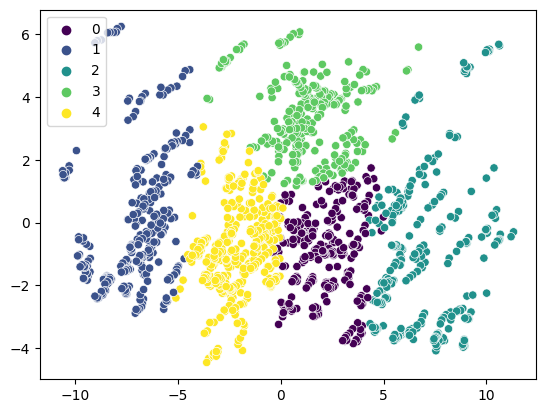

In [17]:
# K-Means pour les données projetées
kmeans = KMeans(n_clusters=5)
kmeans.fit(Xk_projected)
clusters = kmeans.labels_

# Créer un scatterplot avec les étiquettes de cluster
sns.scatterplot(x=Xk_projected[:, 0], y=Xk_projected[:, 1], hue=clusters, palette='viridis', alpha=1)
plt.legend()
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">utilisation du CAH  </h3>
</div>

In [18]:
df_cah_log = df_log
#extraire les valeurs numériques du dataset
x = df_cah_log.values  # Utilise seulement les données numériques

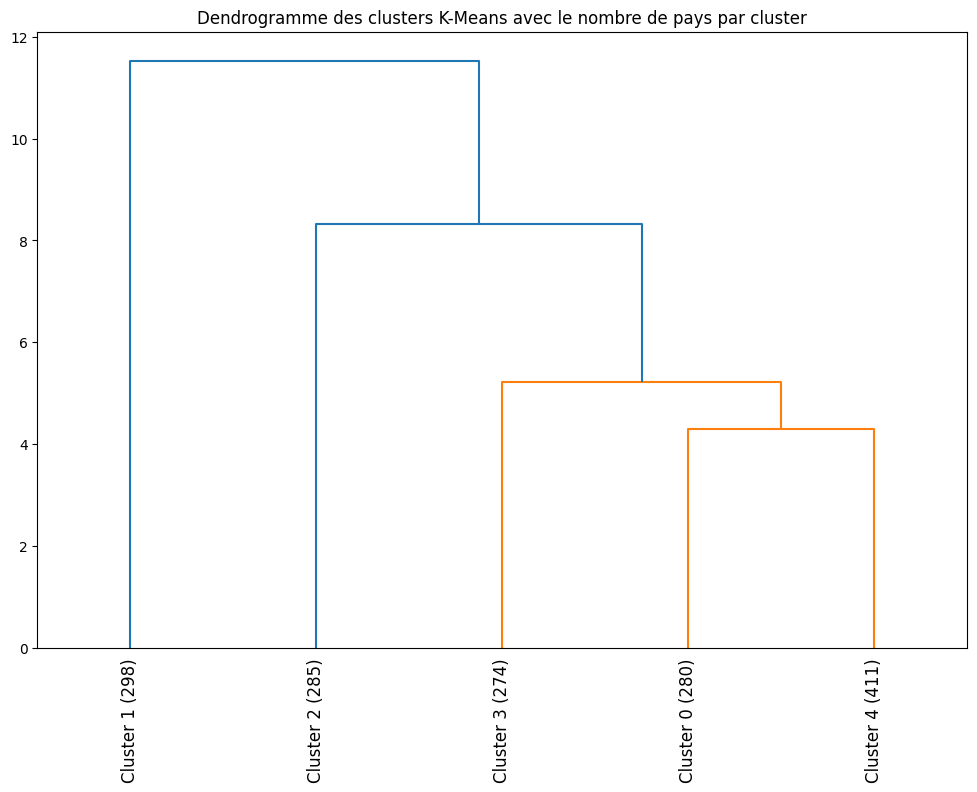

In [19]:
# Exécution de l'algorithme de clustering hiérarchique
Z = linkage(kmeans.cluster_centers_, method='ward')


# Recalculer unique_clusters et counts
unique_clusters, counts = np.unique(kmeans.labels_, return_counts=True)

# Création d'un dictionnaire pour associer les noms de clusters avec leur comptage
cluster_names = {i: f"Cluster {i} ({count})" for i, count in zip(unique_clusters, counts)}

# Affichage du dendrogramme avec les noms de clusters
plt.figure(figsize=(12, 8))
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=12.,
    labels=[cluster_names[i] for i in range(len(Z) + 1)]
)
plt.title('Dendrogramme des clusters K-Means avec le nombre de pays par cluster')
plt.show()

In [20]:
# utiliser  AgglomerativeClustering pour determiner le contenu des clusters.
agg_clustering = AgglomerativeClustering(n_clusters=5)

In [21]:
#appliquer l'algorithme sur mes données
agg_clustering.fit(df_cah_log)

AgglomerativeClustering(n_clusters=5)

In [22]:
#creer une colonne pour mettre les clusters générés
df_cah_log['label'] = agg_clustering.labels_
df_cah_log.head()

Production/T  Importations - Quantité/T  \
Clé_primaire                                                
Afghanistan_2010      3.332205                   3.663562   
Afghanistan_2011      3.258097                   3.931826   
Afghanistan_2012      3.218876                   3.091042   
Afghanistan_2013      3.258097                   3.871201   
Afghanistan_2014      3.218876                   3.761200   

                  Disponibilité intérieure/T  Nourriture/T  Kg/personne/an  \
Clé_primaire                                                                 
Afghanistan_2010                    4.174387      4.174387        0.693147   
Afghanistan_2011                    4.025352      4.025352        0.693147   
Afghanistan_2012                    4.127134      4.127134        0.693147   
Afghanistan_2013                    4.204693      4.204693        0.693147   
Afghanistan_2014                    4.234107      4.234107        0.693147   

                  Kcal/personne/jour  Population  \
Clé_primaire                                       
Afghanistan_2010            2.197225   17.154466   
Afghanistan_2011            1.945910   17.191361   
Afghanistan_2012            2.079442   17.232138   
Afghanistan_2013            2.079442   17.266805   
Afghanistan_2014            2.079442   17.303381   

                  Croissance annuelle US$ par habitant %  US $ par habitant  \
Clé_primaire                                                                  
Afghanistan_2010                                3.135494           6.255750   
Afghanistan_2011                                2.639057           6.385194   
Afghanistan_2012                                1.791759           6.442540   
Afghanistan_2013                                0.000000           6.432940   
Afghanistan_2014                                0.000000           6.393591   

                  Total_T_personne_an  Total_USD  label  
Clé_primaire                                             
Afghanistan_2010            10.939852  23.410216      3  
Afghanistan_2011            10.976748  23.576556      3  
Afghanistan_2012            11.017514  23.674678      3  
Afghanistan_2013            11.052191  23.699746      3  
Afghanistan_2014            11.088767  23.696972      3

In [23]:
# comprendre la caractérisation des clusters
df_cah_log.groupby(['label']).mean()

Production/T  Importations - Quantité/T  Disponibilité intérieure/T  \
label                                                                        
0          1.012924                   1.457125                    2.218399   
1          6.474221                   0.507770                    6.408555   
2          4.199143                   3.834451                    4.830476   
3          3.395419                   1.482434                    3.843108   
4          7.193531                   5.108429                    7.287862   

       Nourriture/T  Kg/personne/an  Kcal/personne/jour  Population  \
label                                                                 
0          2.129073        2.770806            4.073025   13.214542   
1          6.377041        2.531399            3.872606   17.649573   
2          4.787662        2.959712            4.293727   15.649923   
3          3.829951        1.023262            2.353147   16.629184   
4          7.266102        3.275200            4.617613   17.805982   

       Croissance annuelle US$ par habitant %  US $ par habitant  \
label                                                              
0                                    1.191834           8.592190   
1                                    1.361690           8.605790   
2                                    1.256507           9.201556   
3                                    1.422596           6.872495   
4                                    1.236122           9.535231   

       Total_T_personne_an  Total_USD  
label                                  
0                 8.611415  21.806732  
1                13.273215  26.255363  
2                11.701875  24.851478  
3                10.744678  23.501679  
4                14.173426  27.341213

In [24]:
# réalisation des 5 clusters 
for i in range(5):
    print(f'Cluster {i}')
    print(df_cah_log[df_cah_log.label == i].index.tolist())
    print()

Cluster 0
['Antigua-et-Barbuda_2010', 'Antigua-et-Barbuda_2011', 'Antigua-et-Barbuda_2012', 'Antigua-et-Barbuda_2013', 'Antigua-et-Barbuda_2014', 'Antigua-et-Barbuda_2015', 'Antigua-et-Barbuda_2016', 'Antigua-et-Barbuda_2017', 'Antigua-et-Barbuda_2018', 'Bahamas_2010', 'Bahamas_2011', 'Bahamas_2012', 'Bahamas_2013', 'Bahamas_2014', 'Bahamas_2015', 'Bahamas_2016', 'Bahamas_2017', 'Bahamas_2018', 'Barbade_2010', 'Barbade_2011', 'Barbade_2012', 'Barbade_2013', 'Barbade_2014', 'Barbade_2015', 'Barbade_2016', 'Barbade_2017', 'Barbade_2018', 'Belize_2010', 'Belize_2011', 'Belize_2012', 'Belize_2013', 'Belize_2014', 'Belize_2015', 'Belize_2016', 'Belize_2017', 'Belize_2018', 'Botswana_2010', 'Botswana_2011', 'Botswana_2012', 'Botswana_2013', 'Botswana_2014', 'Botswana_2015', 'Botswana_2016', 'Botswana_2017', 'Botswana_2018', 'Burundi_2010', 'Burundi_2011', 'Burundi_2012', 'Burundi_2013', 'Burundi_2014', 'Burundi_2015', 'Burundi_2016', 'Burundi_2017', 'Burundi_2018', 'Cabo Verde_2010', 'Cabo V